# Task : Try to predict major earthquake event 

The task:<br>
You are given real measurements collected on a course of 30 years and transformed into a classification problem by the following:
A major event is defined as any reading of over 5 on the Richter Scale. 
To ignore aftershocks, a positive case is considered to be one where a major event is not preceded by another major event for at least 512 hours. 
Negative cases are instances with readings below 4 (to avoid blurring of the boundaries between major and non major events) that are preceded by at least 20 readings in the previous 512 hours that are non-zero (to avoid trivial negative cases). 
None of the cases overlap in time.

You are given a training file and a testing file for the above data. In the files, each set of 512 measurements is followed by a label: 1 for major event, 0 otherwise.

You should develop a solution in python for the above prediction problem. You should train your solution (only) on the training data and report accuracy measurements when running you solution on the testing data. Your submission should include your running code and a pdf explaining your solution, the results and your recommended next steps.


## Source
I found this dataset here - http://timeseriesclassification.com/description.php?Dataset=Earthquakes <br>
Notice that the best accuracy is 75.92%

## Rictor Scale

I read a bit about Rictor Scale.<br>
I understand that it's a logarithmic scale.
In many ML algorithms, usually the calculations on the features are considering Euclidian distance. But in our case of logarithmic scale, I'm not sure how it will effect the loss fuctions and inner calculation of the ML models (For example, in logarithmic scale, 5-3 >> 3-1). <br>
We also need to deal with negative numbers. In Rictor Scale, they are used to represent scale that is smaller than 1. (for example 1/10 as -1 etc.)<br>
Maybe we need to upscale all the mesurments.

## Summary of the notebook:

1. Show me the data! - Present numeric statistics on the train and test datasets.

2. Testset: "Trainset, do you really know me well enough?" - Try to describe the numeric statistics, and see the differences between the train and the test sets. This is done to understand if we can infer something usefull on the test set by learning on the training set. In this phase we will plot the train and test statistics (like mean, std, quartiles etc) in the same plot and try to identify similarity.

3. Show me the classes! - Now we will look only at the train set, and try to understand how the two classes (Earthquake, No-Earthquake) looks like. We will present the ratio between the classes. In addition, will will take 5 random samples from each class(all samples from the train set) and plot each couple of them (one from Earthquake class, and one from No-Earthquake class) and look for some visible patterns.

4. Features vs Features - We will want to know if the features are correlated, so we'll calculate the correlation matrix between all of the 512 features, and print the highest values (printing the entire matrix is too big and isn't informative). By doing it, we can find more patterns in the data, maybe to collapse few consecutive mesurments into one value or remove some correlated features.

5. Features, describe yourselfs! - To better understand the features, we will print a boxplot for each feature. This way we can see if the data is currupted with noisy measurments, understand the scale of each feature and identify outliers.

6. Can we finally start playing with ML??? - Now when we have better understanding of the data, we will apply some out of the box machine learning algorithms.

7. It's all about perspective - After investigating the ML results, we will try to improve them by appling transformations (standartization, Furie transformation, upsampling, undersampling) on the data and apply the previous ML algorithms again and investigate the results.

8. Now some deep learning (LSTM) for the fun.

9. Run all combinations - Auto-Sklearn is a module that try to search for an ensamble of classifiers from sklearn library. I run it for 24 hours.

10. If I had infinit amount of time - Future work



# 1.Show me the data!
Present numeric statistics on the train and test datasets.

Read the data and pring the train set

In [2]:
import pandas as pd
import os


train_file_name = "Student Hiring Project 2017 - Training Data.txt"
train_file_path = os.path.join("..","data",train_file_name)
train_data = pd.read_csv(train_file_path, sep=",", header=None)

test_file_name = "Student Hiring Project 2017 - Testing Data.txt"
test_file_path = os.path.join("..","data",test_file_name)
test_data = pd.read_csv(test_file_path, sep=",", header=None)
train_data

0        1        2        3        4        5        6        7    \
0   -0.51801 -0.51801  2.65420 -0.51801 -0.51801 -0.51801 -0.51801  1.45620   
1    1.94370 -0.35311 -0.35311 -0.35311 -0.35311 -0.35311 -0.35311 -0.35311   
2    2.63850 -0.31610 -0.31610 -0.31610 -0.31610 -0.31610 -0.31610 -0.31610   
3   -0.53114 -0.53114 -0.53114 -0.53114 -0.53114 -0.53114 -0.53114 -0.53114   
4   -0.59366  2.02010  1.17470 -0.59366 -0.59366  1.60600  1.21790  1.58880   
5    4.72670 -0.24025 -0.24025 -0.24025 -0.24025 -0.24025 -0.24025 -0.24025   
6   -0.42951 -0.42951 -0.42951 -0.42951 -0.42951 -0.42951 -0.42951 -0.42951   
7   -0.55077 -0.55077 -0.55077 -0.55077 -0.55077 -0.55077  2.31530 -0.55077   
8   -0.20715 -0.20715 -0.20715 -0.20715 -0.20715 -0.20715 -0.20715 -0.20715   
9    1.47920 -0.52883 -0.52883  1.49770 -0.52883 -0.52883 -0.52883 -0.52883   
10  -0.44799 -0.44799 -0.44799 -0.44799 -0.44799 -0.44799 -0.44799 -0.44799   
11  -0.68904  1.13300  1.17400  2.10140 -0.68904  1.34640 -0.68904 -0.68904   
12  -0.20405 -0.20405 -0.20405 -0.20405 -0.20405 -0.20405 -0.20405 -0.20405   
13  -0.26656 -0.26656 -0.26656 -0.26656 -0.26656 -0.26656 -0.26656 -0.26656   
14  -0.59892 -0.59892 -0.59892 -0.59892  1.47650  1.52810 -0.59892  1.17510   
15  -0.38480 -0.38480 -0.38480 -0.38480 -0.38480 -0.38480 -0.38480 -0.38480   
16   1.13830 -0.60440  1.60130  1.74440  1.18040  1.09620 -0.60440 -0.60440   
17  -0.30836 -0.30836 -0.30836 -0.30836  3.79720 -0.30836  2.95110 -0.30836   
18   3.22480 -0.41310 -0.41310 -0.41310 -0.41310 -0.41310  2.35760 -0.41310   
19   1.76300 -0.47368  2.46440 -0.47368 -0.47368 -0.47368 -0.47368 -0.47368   
20  -0.43394 -0.43394 -0.43394  2.12390  2.09200 -0.43394 -0.43394 -0.43394   
21  -0.25160 -0.25160 -0.25160 -0.25160 -0.25160  3.79380 -0.25160 -0.25160   
22  -0.48066 -0.48066 -0.48066 -0.48066  1.75460 -0.48066 -0.48066 -0.48066   
23  -0.51388  1.49480 -0.51388 -0.51388 -0.51388 -0.51388 -0.51388 -0.51388   
24  -0.19825 -0.19825 -0.19825 -0.19825  4.88960 -0.19825 -0.19825 -0.19825   
25  -0.44437 -0.44437 -0.44437 -0.44437 -0.44437 -0.44437 -0.44437 -0.44437   
26  -0.47365 -0.47365 -0.47365 -0.47365 -0.47365 -0.47365  1.93750  1.64770   
27  -0.49262 -0.49262 -0.49262 -0.49262 -0.49262  1.42600 -0.49262 -0.49262   
28  -0.44505 -0.44505 -0.44505 -0.44505 -0.44505 -0.44505 -0.44505 -0.44505   
29  -0.39066 -0.39066 -0.39066 -0.39066 -0.39066 -0.39066  2.07060 -0.39066   
..       ...      ...      ...      ...      ...      ...      ...      ...   
292 -0.54807  1.40340 -0.54807 -0.54807 -0.54807 -0.54807 -0.54807 -0.54807   
293 -0.30564 -0.30564 -0.30564 -0.30564 -0.30564 -0.30564 -0.30564 -0.30564   
294 -0.49722 -0.49722  1.65610 -0.49722 -0.49722 -0.49722 -0.49722 -0.49722   
295  1.89580 -0.44248 -0.44248  2.06280 -0.44248 -0.44248 -0.44248 -0.44248   
296 -0.45192 -0.45192 -0.45192  1.58060 -0.45192 -0.45192 -0.45192 -0.45192   
297 -0.31669 -0.31669 -0.31669 -0.31669 -0.31669 -0.31669 -0.31669  2.96390   
298 -0.46453 -0.46453 -0.46453 -0.46453 -0.46453 -0.46453 -0.46453  1.48700   
299 -0.21338 -0.21338 -0.21338 -0.21338 -0.21338 -0.21338 -0.21338 -0.21338   
300 -0.34562 -0.34562 -0.34562 -0.34562 -0.34562 -0.34562 -0.34562 -0.34562   
301 -0.56629 -0.56629 -0.56629  1.65630  1.89410 -0.56629  1.48250 -0.56629   
302 -0.44351  1.77530 -0.44351 -0.44351 -0.44351  2.12450  1.73420 -0.44351   
303 -0.47258 -0.47258 -0.47258 -0.47258  1.73340 -0.47258 -0.47258 -0.47258   
304 -0.56541 -0.56541 -0.56541  1.38200 -0.56541 -0.56541  1.78960 -0.56541   
305 -0.25173 -0.25173 -0.25173 -0.25173 -0.25173 -0.25173 -0.25173 -0.25173   
306 -0.49449 -0.49449 -0.49449 -0.49449 -0.49449  1.44670 -0.49449 -0.49449   
307 -0.54918  1.74860  2.17040 -0.54918 -0.54918 -0.54918 -0.54918  2.17940   
308 -0.26664 -0.26664 -0.26664 -0.26664 -0.26664 -0.26664  3.31980 -0.26664   
309 -0.64389 -0.64389 -0.64389 -0.64389 -0.64389 -0.64389  1.52610  1.46650   
310 -0.55832 -0.55832 -0.55832 -0.55832 -0.55832  1.43110  

Print some statistics on the train set

In [2]:
train_data.describe()

0           1           2           3           4           5    \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean     0.054087   -0.012574    0.060070    0.063549   -0.008471    0.000617   
std      1.071217    0.974198    1.037486    1.063594    0.950325    0.990518   
min     -0.885820   -0.885820   -0.885820   -0.786820   -0.786820   -0.885820   
25%     -0.490418   -0.493295   -0.485685   -0.497062   -0.496430   -0.491670   
50%     -0.391835   -0.406375   -0.385140   -0.393740   -0.395130   -0.401140   
75%     -0.252088   -0.262657   -0.245588   -0.249518   -0.252088   -0.262657   
max      5.199600    3.927100    4.740100    4.097600    4.889600    4.316300   

              6           7           8           9       ...             503  \
count  322.000000  322.000000  322.000000  322.000000     ...      322.000000   
mean     0.037938   -0.012117    0.028848   -0.061057     ...       -0.013927   
std      1.061623    1.007050    1.030406    0.945413     ...        1.036097   
min     -0.885820   -0.885820   -0.754620   -0.885820     ...       -0.885820   
25%     -0.493295   -0.494248   -0.490418   -0.514338     ...       -0.513188   
50%     -0.393740   -0.407790   -0.394570   -0.422630     ...       -0.412665   
75%     -0.251632   -0.266825   -0.251632   -0.283340     ...       -0.266825   
max      6.270400    4.296300    5.157300    3.557100     ...        4.954200   

              504         505         506         507         508         509  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean    -0.053676   -0.090294   -0.093705   -0.195098   -0.179217   -0.213229   
std      0.911249    0.893855    0.871573    0.746652    0.777177    0.748119   
min     -0.885820   -0.786820   -0.885820   -0.885820   -0.885820   -0.885820   
25%     -0.494248   -0.513432   -0.500205   -0.515700   -0.514338   -0.519325   
50%     -0.401140   -0.415880   -0.407790   -0.431450   -0.422760   -0.435955   
75%     -0.265127   -0.281925   -0.280683   -0.304370   -0.304175   -0.308490   
max      3.885200    3.231100    3.887900    3.556700    3.597800    3.745800   

              510         511         512  
count  322.000000  322.000000  322.000000  
mean    -0.209882   -0.228489    0.180124  
std      0.777102    0.760788    0.384889  
min     -0.885820   -0.885820    0.000000  
25%     -0.514657   -0.525720    0.000000  
50%     -0.431450   -0.437355    0.000000  
75%     -0.309235   -0.312452    0.000000  
max      5.497700    3.744200    1.000000  

[8 rows x 513 columns]

Print some statistics on the test set

In [3]:
test_data.describe()

0           1           2           3           4           5    \
count  139.000000  139.000000  139.000000  139.000000  139.000000  139.000000   
mean     0.080597    0.106864   -0.073066    0.090010   -0.017291    0.101628   
std      1.141769    1.044256    0.875608    1.046712    1.027365    1.017212   
min     -0.730190   -0.730190   -0.708330   -0.730190   -0.730190   -0.708330   
25%     -0.515040   -0.508000   -0.515065   -0.504435   -0.516775   -0.505260   
50%     -0.440290   -0.402760   -0.443280   -0.416700   -0.439580   -0.422380   
75%     -0.258280   -0.231685   -0.281875   -0.235360   -0.284545   -0.203335   
max      4.514400    3.061800    2.840900    4.257700    4.524400    3.816100   

              6           7           8           9       ...             503  \
count  139.000000  139.000000  139.000000  139.000000     ...      139.000000   
mean    -0.037029   -0.033965   -0.018947   -0.070171     ...       -0.050990   
std      0.924188    0.945663    0.990650    0.872831     ...        0.857365   
min     -0.708330   -0.704200   -0.730190   -0.730190     ...       -0.704200   
25%     -0.515040   -0.514535   -0.518805   -0.512920     ...       -0.505260   
50%     -0.437600   -0.437600   -0.444280   -0.437600     ...       -0.434140   
75%     -0.275410   -0.267860   -0.281875   -0.281875     ...       -0.263180   
max      3.222700    4.402700    3.848100    2.579700     ...        2.939300   

              504         505         506         507         508         509  \
count  139.000000  139.000000  139.000000  139.000000  139.000000  139.000000   
mean    -0.038306    0.021541   -0.078638   -0.078379   -0.126313   -0.052669   
std      0.975202    1.016309    0.967131    0.997565    0.861918    1.066841   
min     -0.708330   -0.708330   -0.730190   -0.708330   -0.730190   -0.730190   
25%     -0.515670   -0.515670   -0.522115   -0.519205   -0.515065   -0.517755   
50%     -0.443280   -0.434140   -0.447690   -0.448390   -0.443280   -0.447200   
75%     -0.284545   -0.258280   -0.296125   -0.303080   -0.303080   -0.304165   
max      4.460500    3.617300    3.387900    4.860500    3.997300    5.134200   

              510         511         512  
count  139.000000  139.000000  139.000000  
mean    -0.061501   -0.241130    0.251799  
std      0.978974    0.699195    0.435616  
min     -0.730190   -0.730190    0.000000  
25%     -0.516650   -0.517755    0.000000  
50%     -0.443280   -0.458360    0.000000  
75%     -0.288355   -0.333030    0.500000  
max      4.379900    2.839600    1.000000  

[8 rows x 513 columns]

# Testset: "Trainset, do you really know me well enough?"
Try to describe the numeric statistics, and see the differences between the train and the test sets. This is done to understand if we can infer something usefull on the test set(got predicitons) by learning on the training set. In this phase we will plot the train and test statistics (like mean, std, quartiles etc) in the same plot and try to identify similarity.

From the findings below, it seems that the train and test sets aren't that similar.

### Print plot for each statistic in the description
X - feature number, Y - measurment value

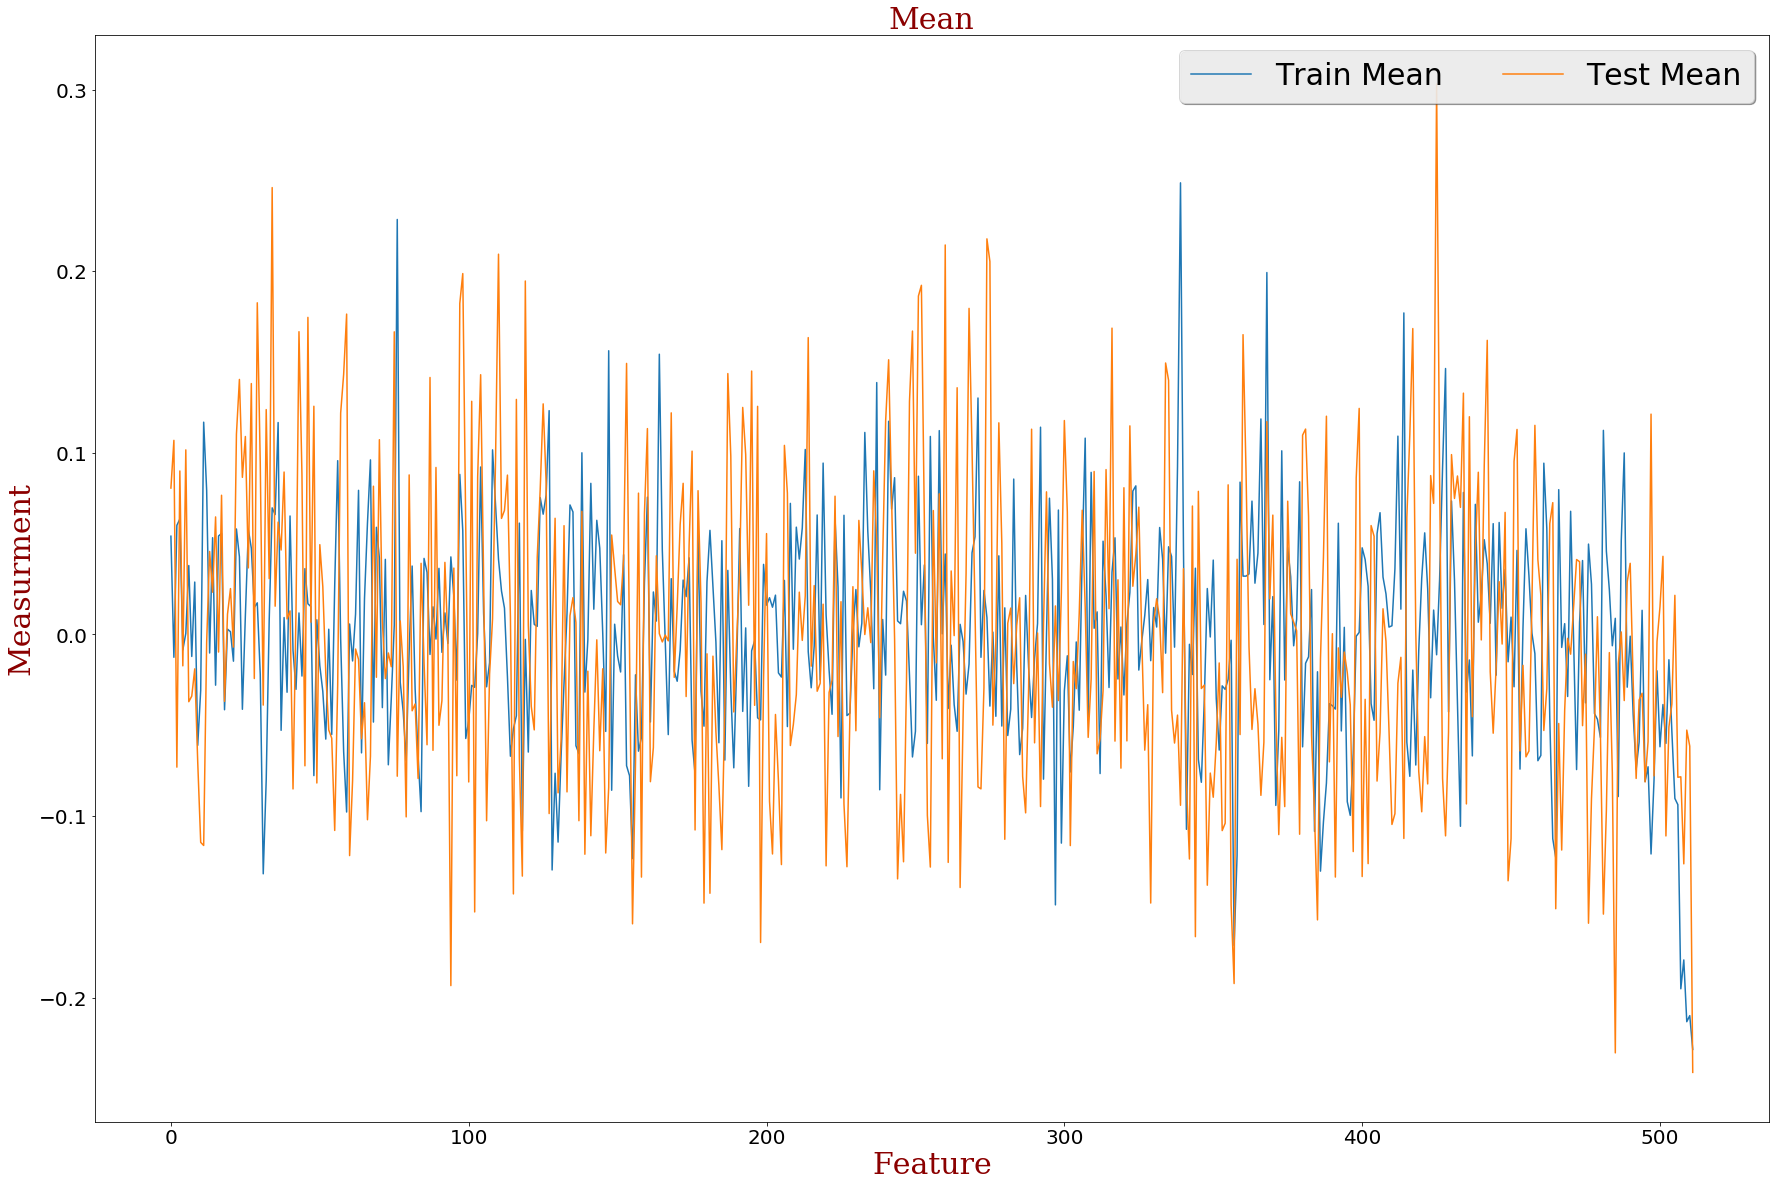

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure



def print_statistic_plot(index):
    """
        Insert a number from 1 to 7 it will print the appropriate plot
        1. mean
        2. std
        3. min
        4. 25%
        5. 50%
        6. 75%
        7. max
    """
    font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 30,
            }


    details_train = train_data.describe()
    details_test = test_data.describe()
    details_names = ["Mean","std","Min","25%","50%","75%","Max"]
    rows_train = details_train.iloc[index,:].values.tolist()[:-1]
    rows_test = details_test.iloc[index,:].values.tolist()[:-1]
    figure(figsize=(30,20))
    plt.title(details_names[index-1], fontdict=font)
    plt.xlabel('Feature', fontdict=font)
    plt.ylabel('Measurment', fontdict=font)
    plt.plot(rows_train, label="Train %s"%details_names[index-1])
    plt.plot(rows_test, label="Test %s"%details_names[index-1])
    plt.tick_params(axis='both', which='major', labelsize=20) # increase axis size

    leg = plt.legend(loc='upper right', ncol=2, shadow=True, fancybox=True,prop={'size': 30})
    plt.show()

print_statistic_plot(1) # mean

* We can see that most of the mean values are bit more extreame in the test set(Yellow). Maybe due to the sample size. (smaller set size, more extreme conclutions). <br>

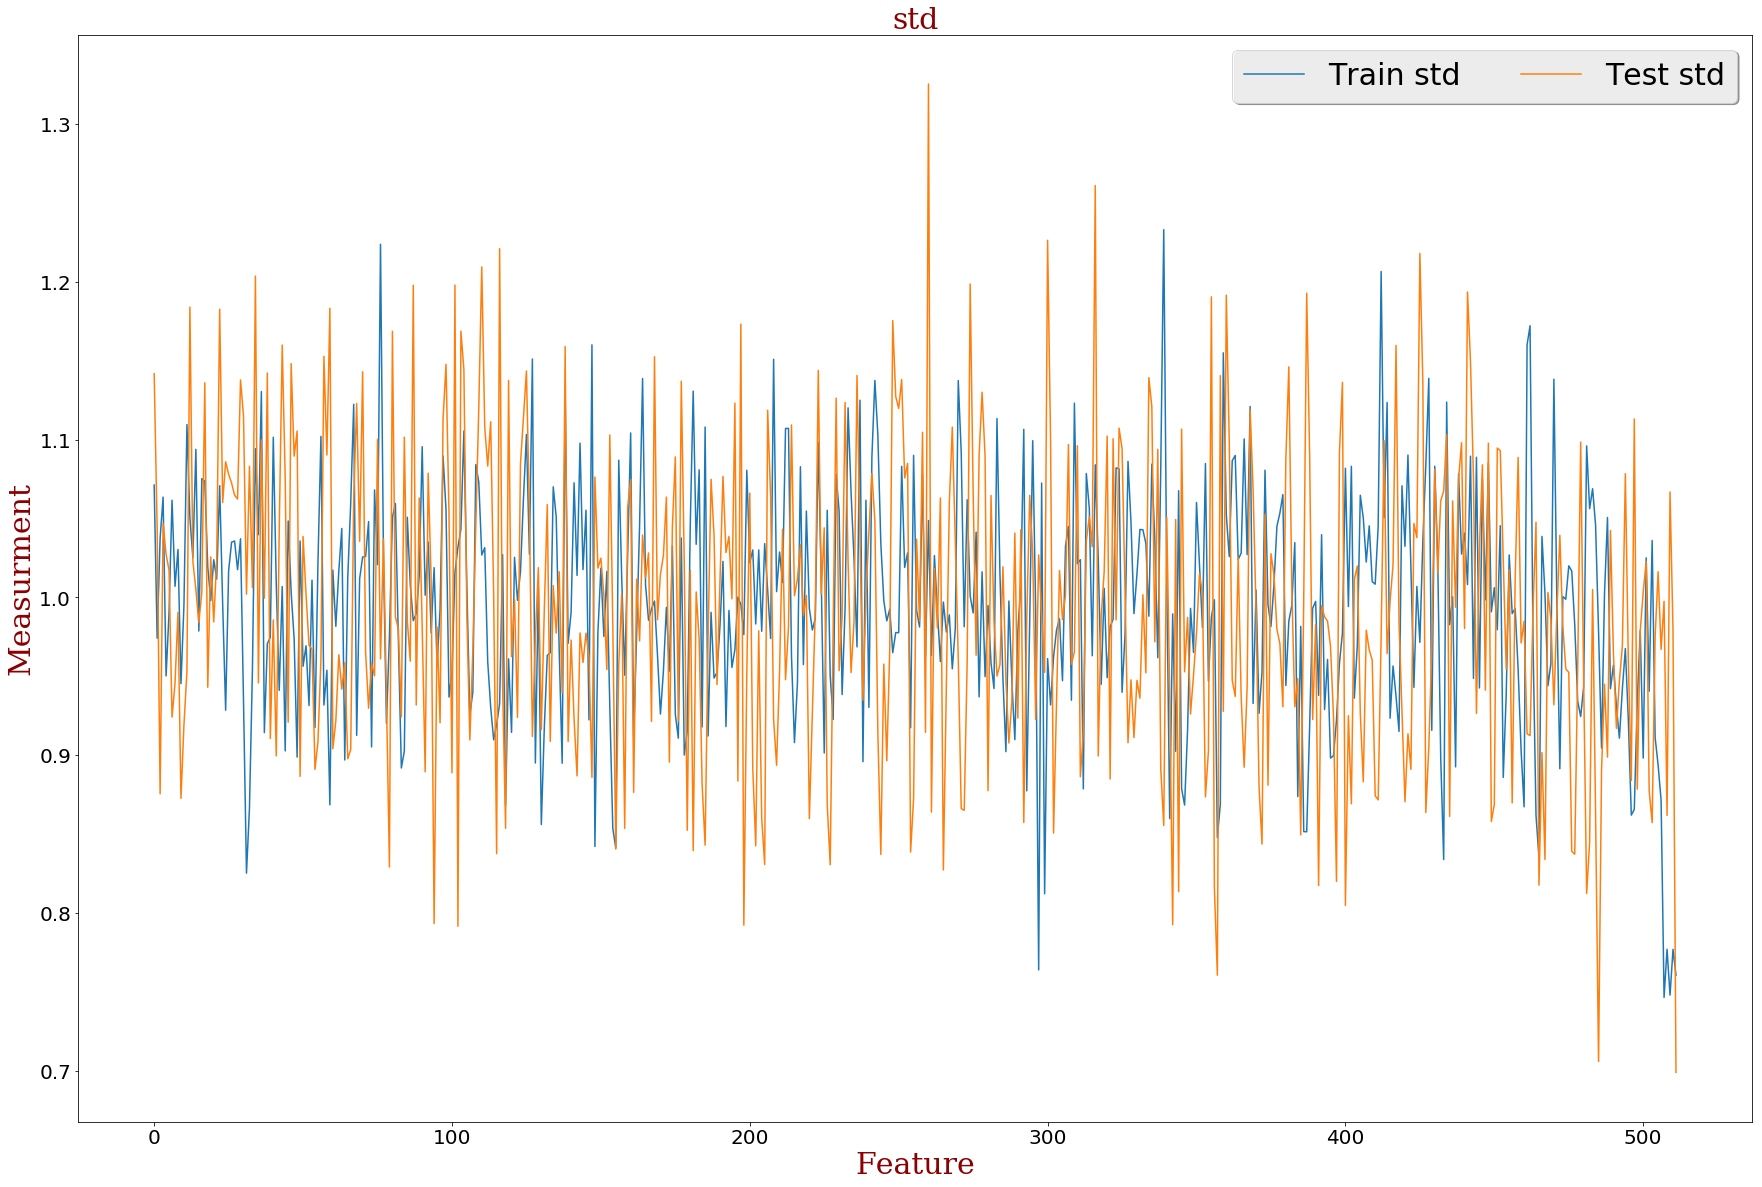

In [51]:
print_statistic_plot(2) # std

* Like the mean, we can see that most of the std values are bit more extreame in the test set(Yellow). Maybe due to the sample size. (smaller set size, more extreme conclutions). 

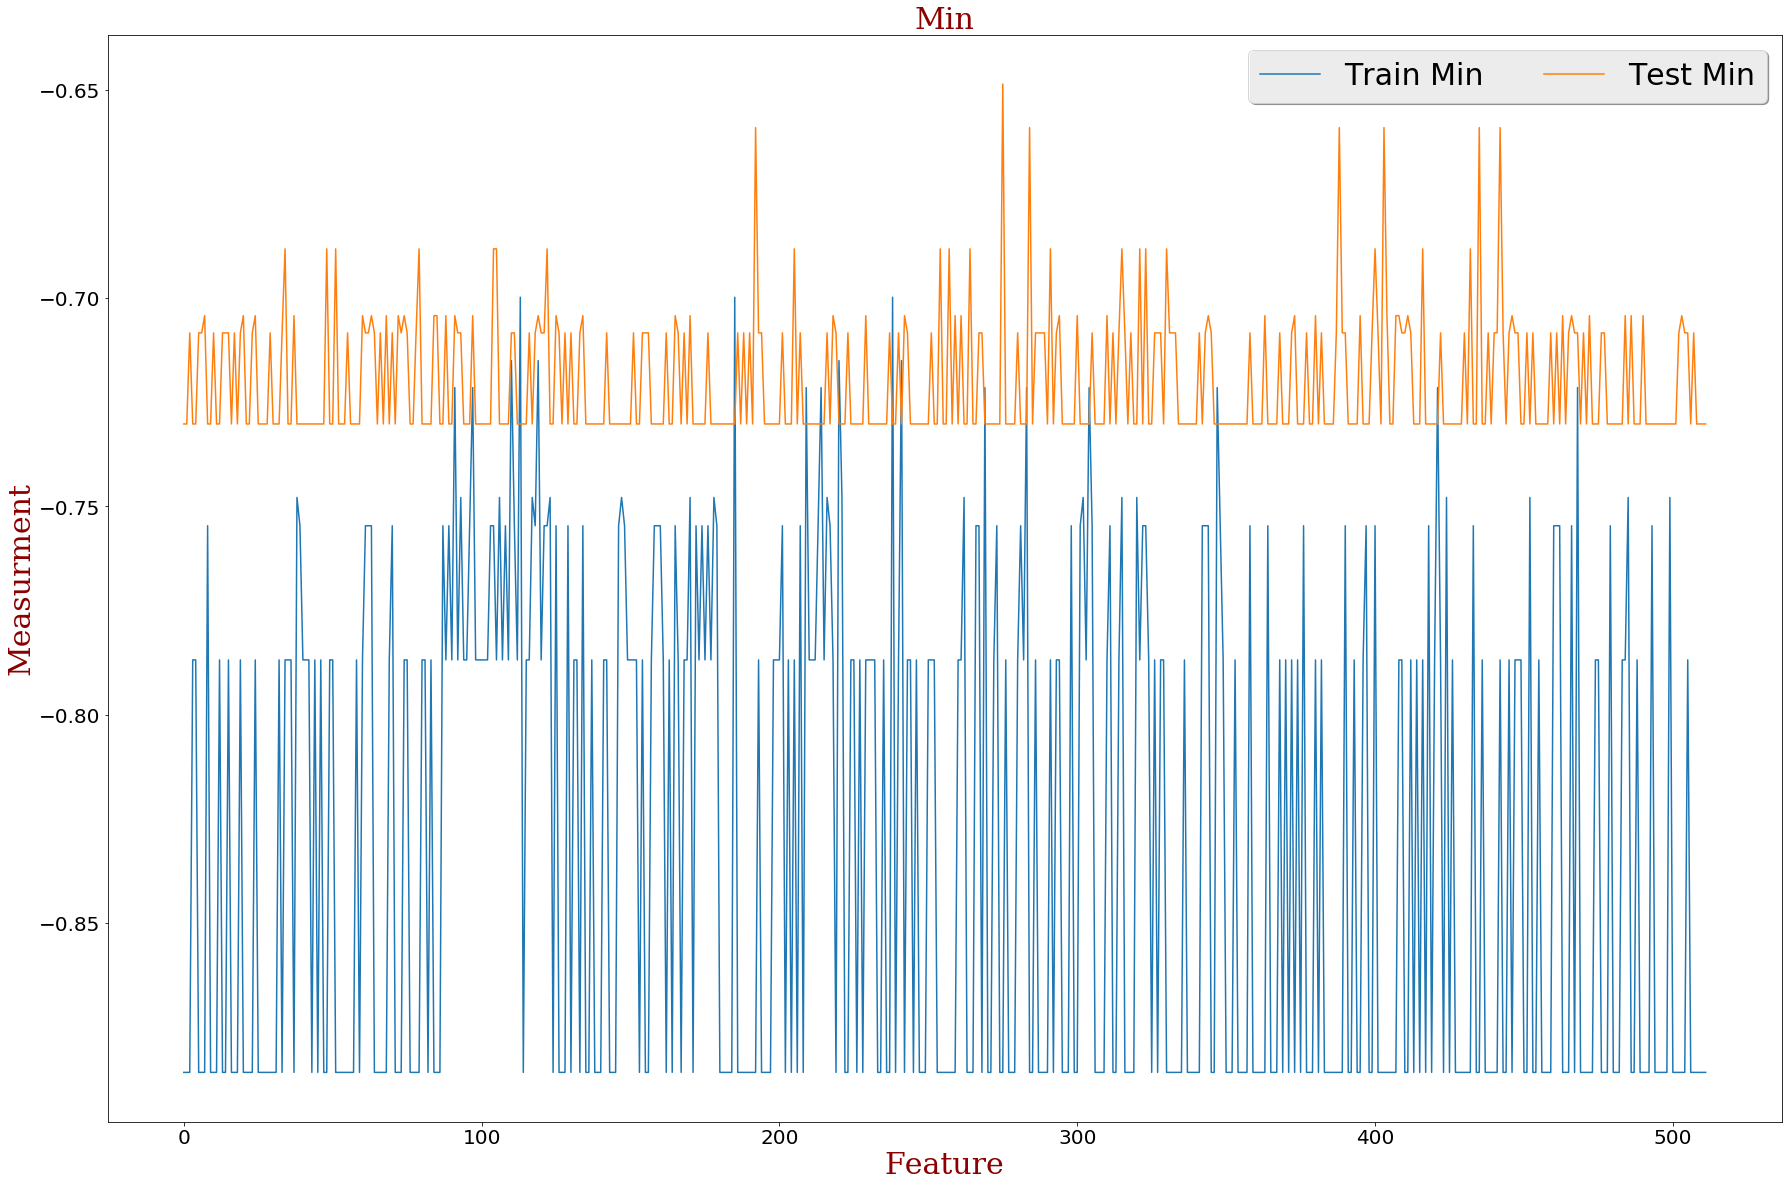

In [52]:
print_statistic_plot(3) # min

* min is lower in train (make sense, more examples in the train set, so more probability for extream cases).

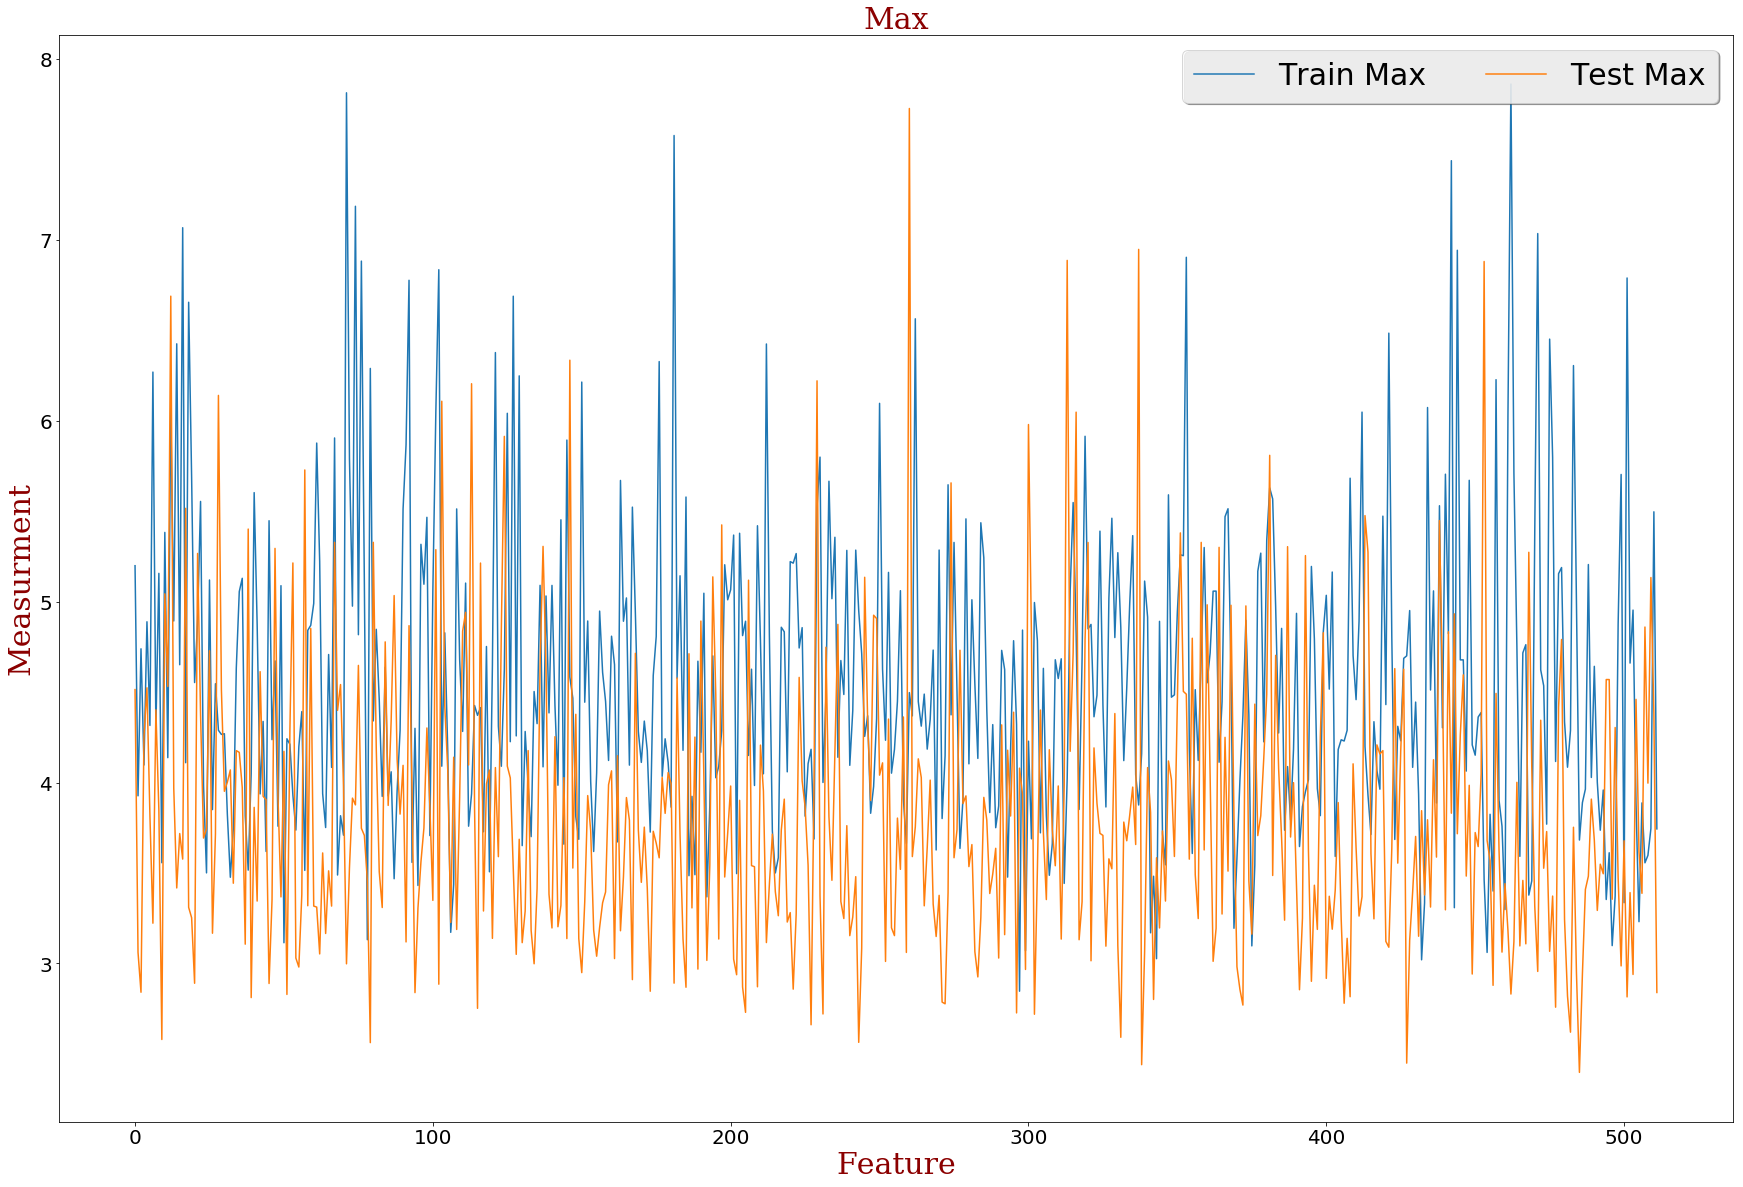

In [53]:
print_statistic_plot(7) # max

* Like in min, max is higher in train (make sense, more examples in the train set, so more probability for extream cases).
* we also know that the calculation of std for a sample containes devision by n-1 and not by n(like for population or for mean of a sample), this is due to the same reason.

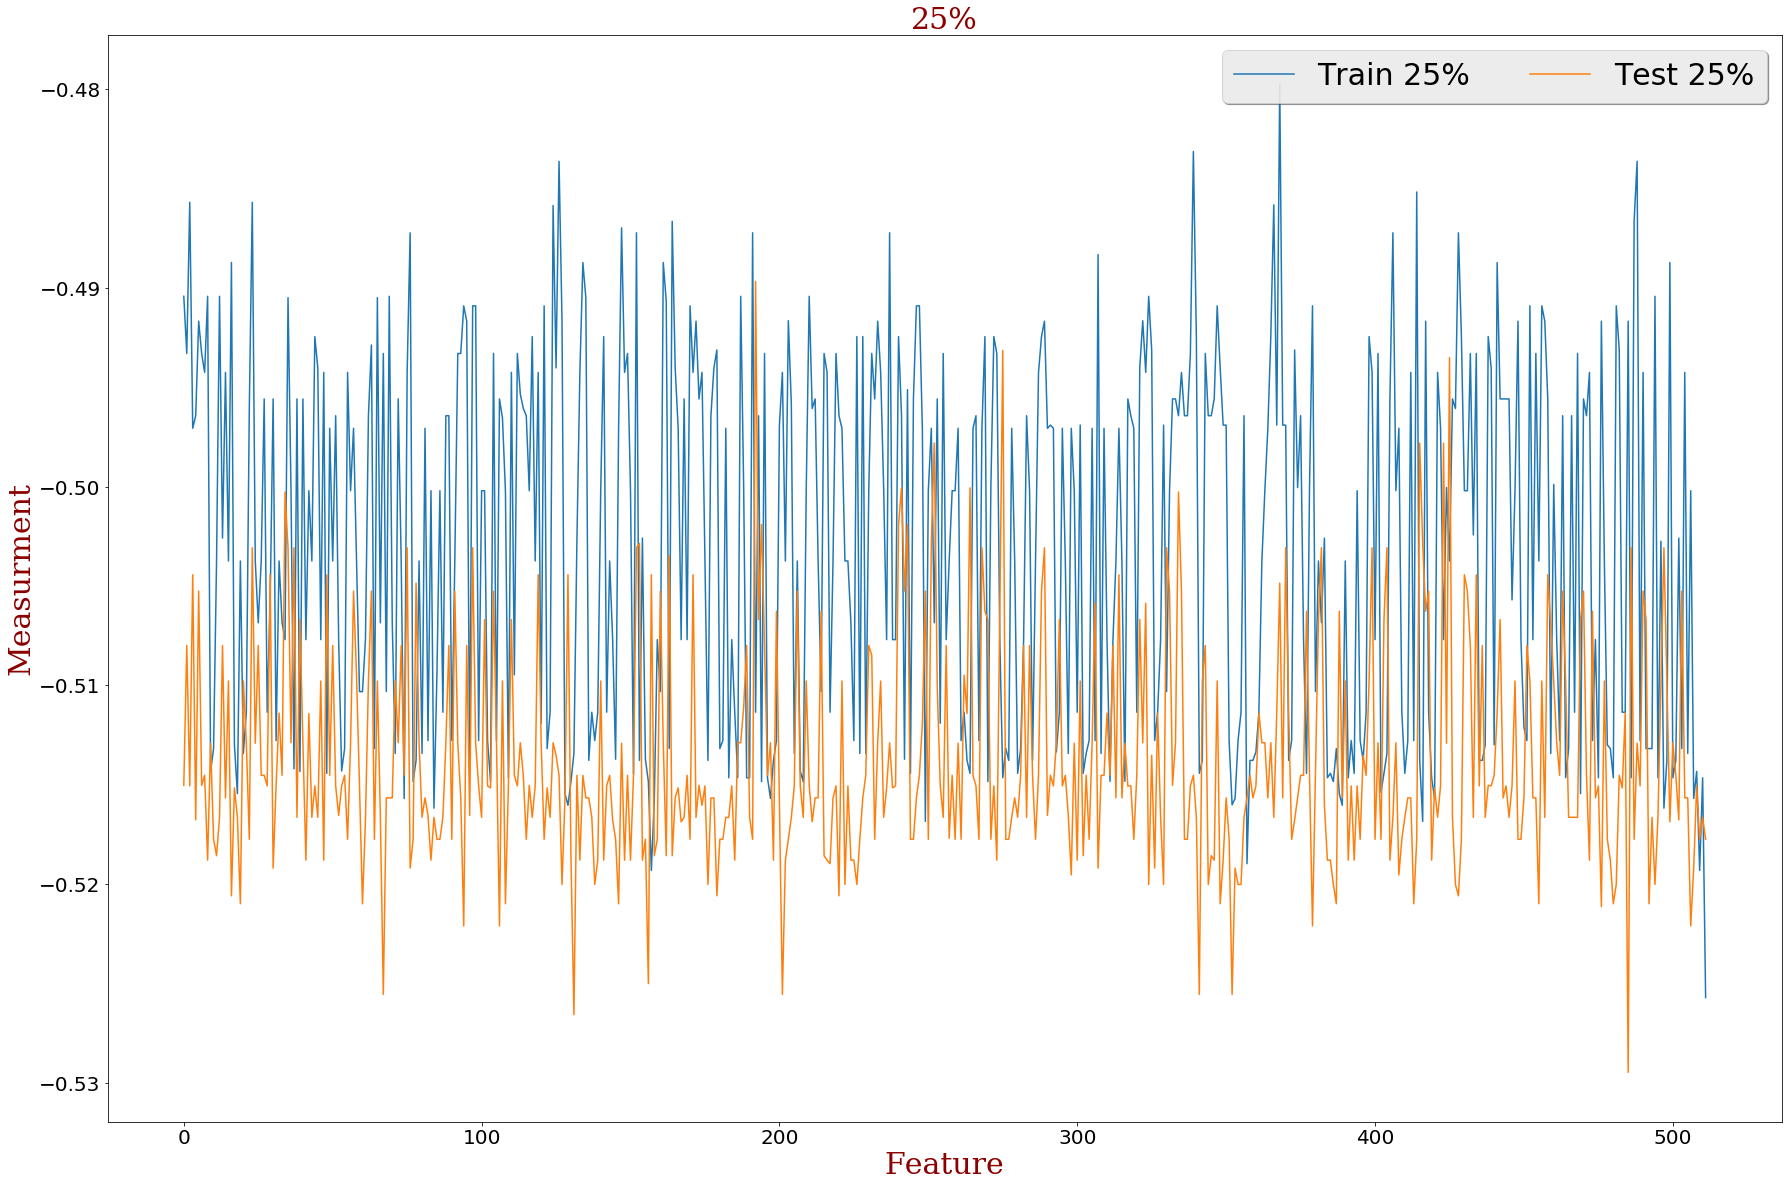

In [54]:
print_statistic_plot(4) # 25%

* 25% quartile is higher in train. (make sense with previous statment about means and std) <br>

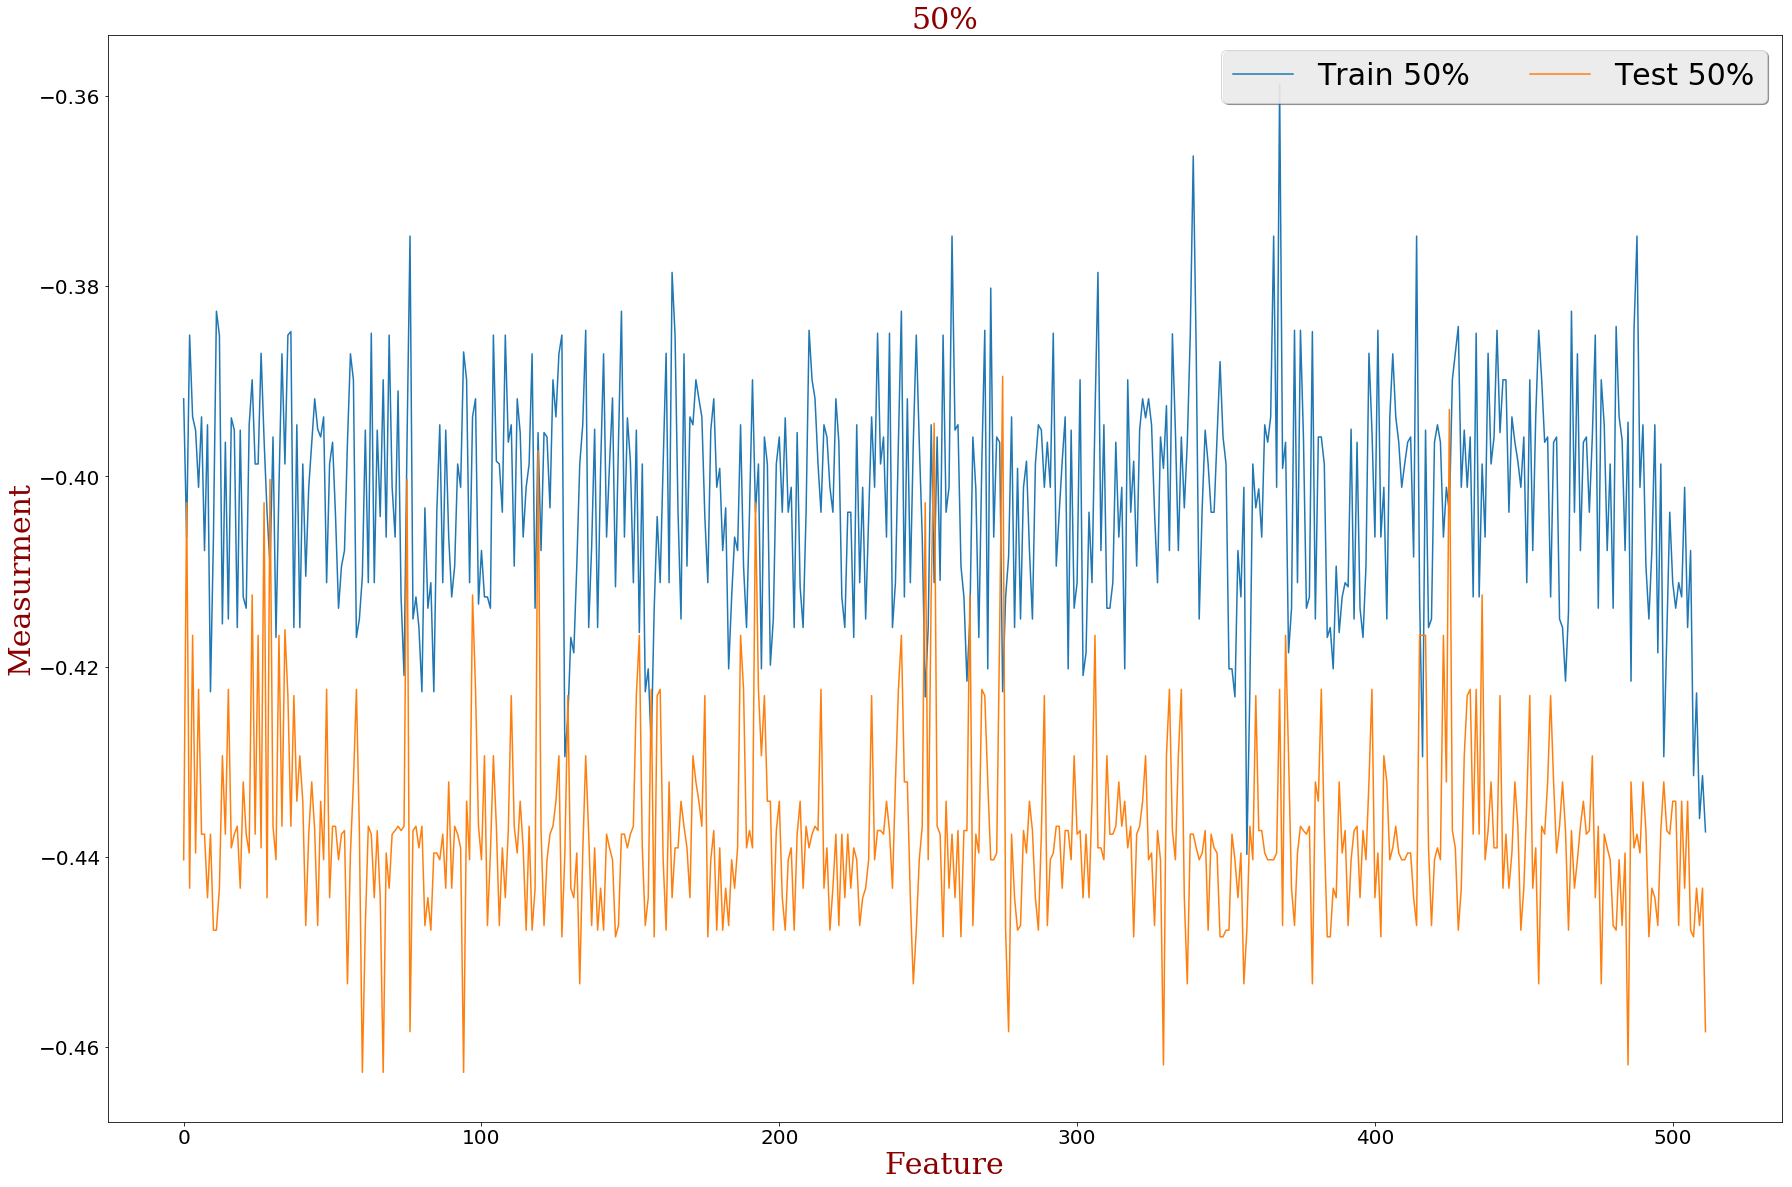

In [55]:
print_statistic_plot(5) # 50%

* 50% quartile is higher in train. I don't thing its a good thing. May indicate that the train doestn't represent the test well enough.

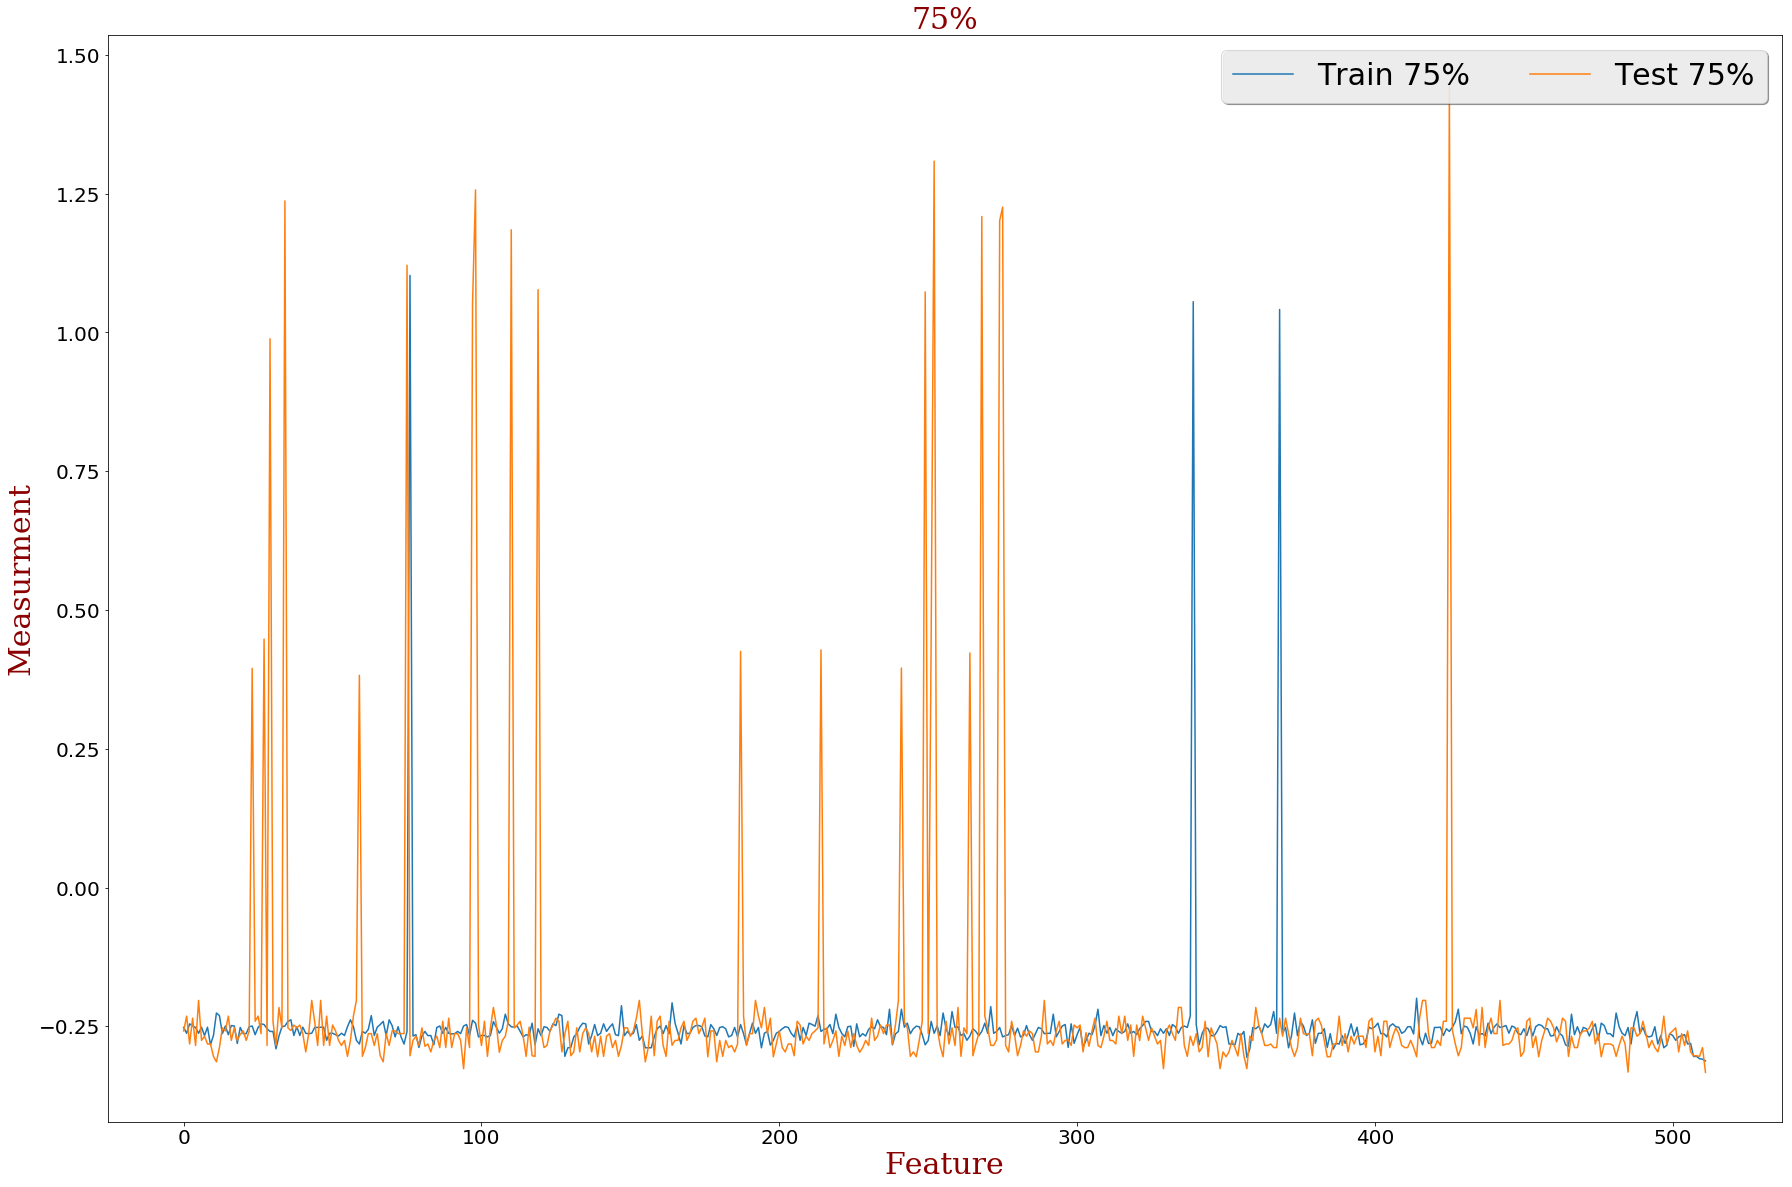

In [56]:
print_statistic_plot(6) # 75%

* 75% in most of the features is the same.

### Final conclusions:
* Maybe we will need to group, shuffle and resplit the train and test sets to get more similar disributions.

# 3. Show me the classes!
Now we will look only at the train set, and try to understand how the two classes (Earchquake, No-Earchquake) looks like. We will present the ratio between the classes. In addition, we will take 10 random samples from each class(all samples from the train set) and plot each couple of them (one from Earchquake class, and one from No-Earchquake class) and look for some visible patterns.

## Print classes ratio

In [58]:
one_label_count_train = train_data.loc[train_data[512] == 1].shape[0]
print("Train")
print("Number of rows with 0 label: ", train_data.shape[0] - one_label_count_train)
print("Number of rows with 1 label: ", one_label_count_train)
print("Total number of rows:        ",train_data.shape[0])


one_label_count_test = test_data.loc[test_data[512] == 1].shape[0]
print("\n\nTest")
print("Number of rows with 0 label: ", test_data.shape[0] - one_label_count_test)
print("Number of rows with 1 label: ", one_label_count_test)
print("Total number of rows:        ",test_data.shape[0])

Train
Number of rows with 0 label:  264
Number of rows with 1 label:  58
Total number of rows:         322


Test
Number of rows with 0 label:  104
Number of rows with 1 label:  35
Total number of rows:         139


Of course there are more no-earthquakes records (0 label) that earthquakes ones(1 label), but the difference isn't too dramatic (1:6 ratio in train, 1:4 in test).
It's a bit weired, I would expect the ratio to be more extream (like 1:100 or more).

## Plot few positive and negative examples from the train set

We will print 5 plots.
Each plot in 2 examples, one Earthquake(label 1, purple color) and one No-Earthquake(label 0, green color).
We will try to see if there is some noticble differences just by looking at the data.
X - Features, Y - Measurment value.

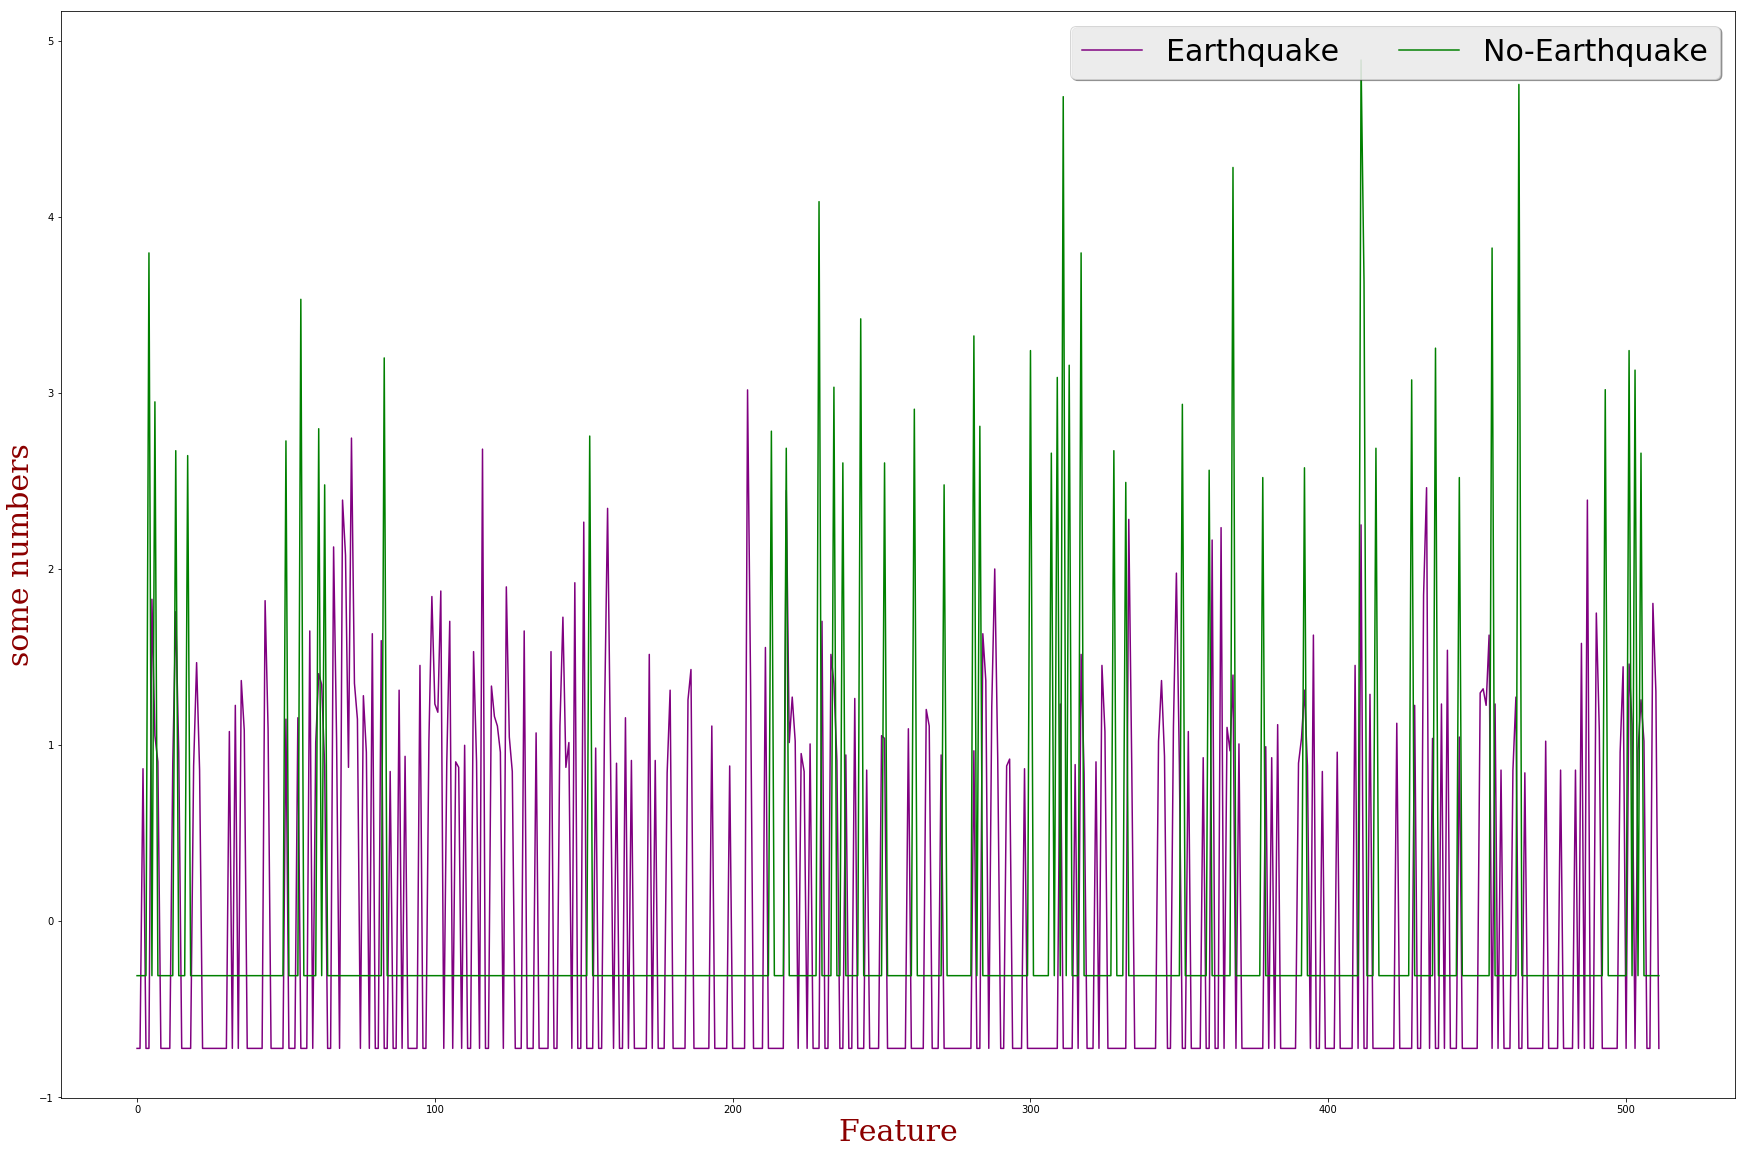

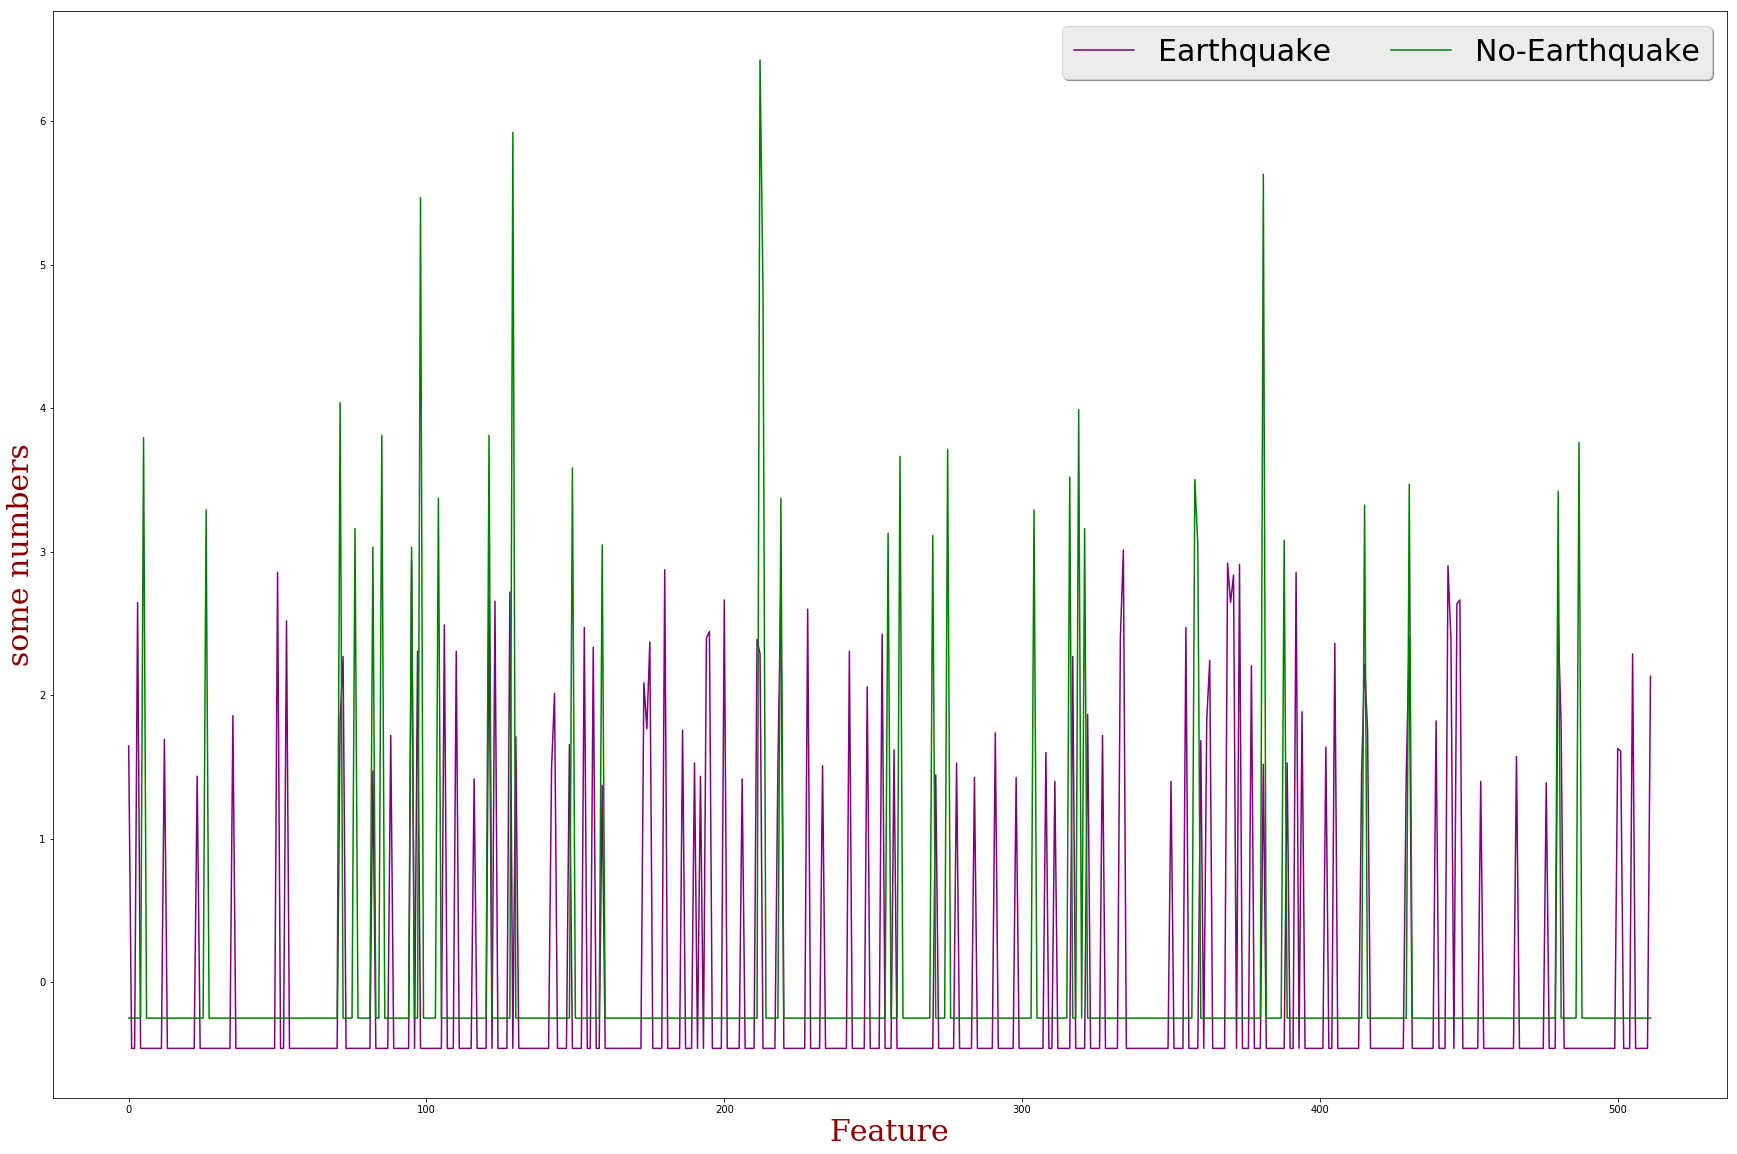

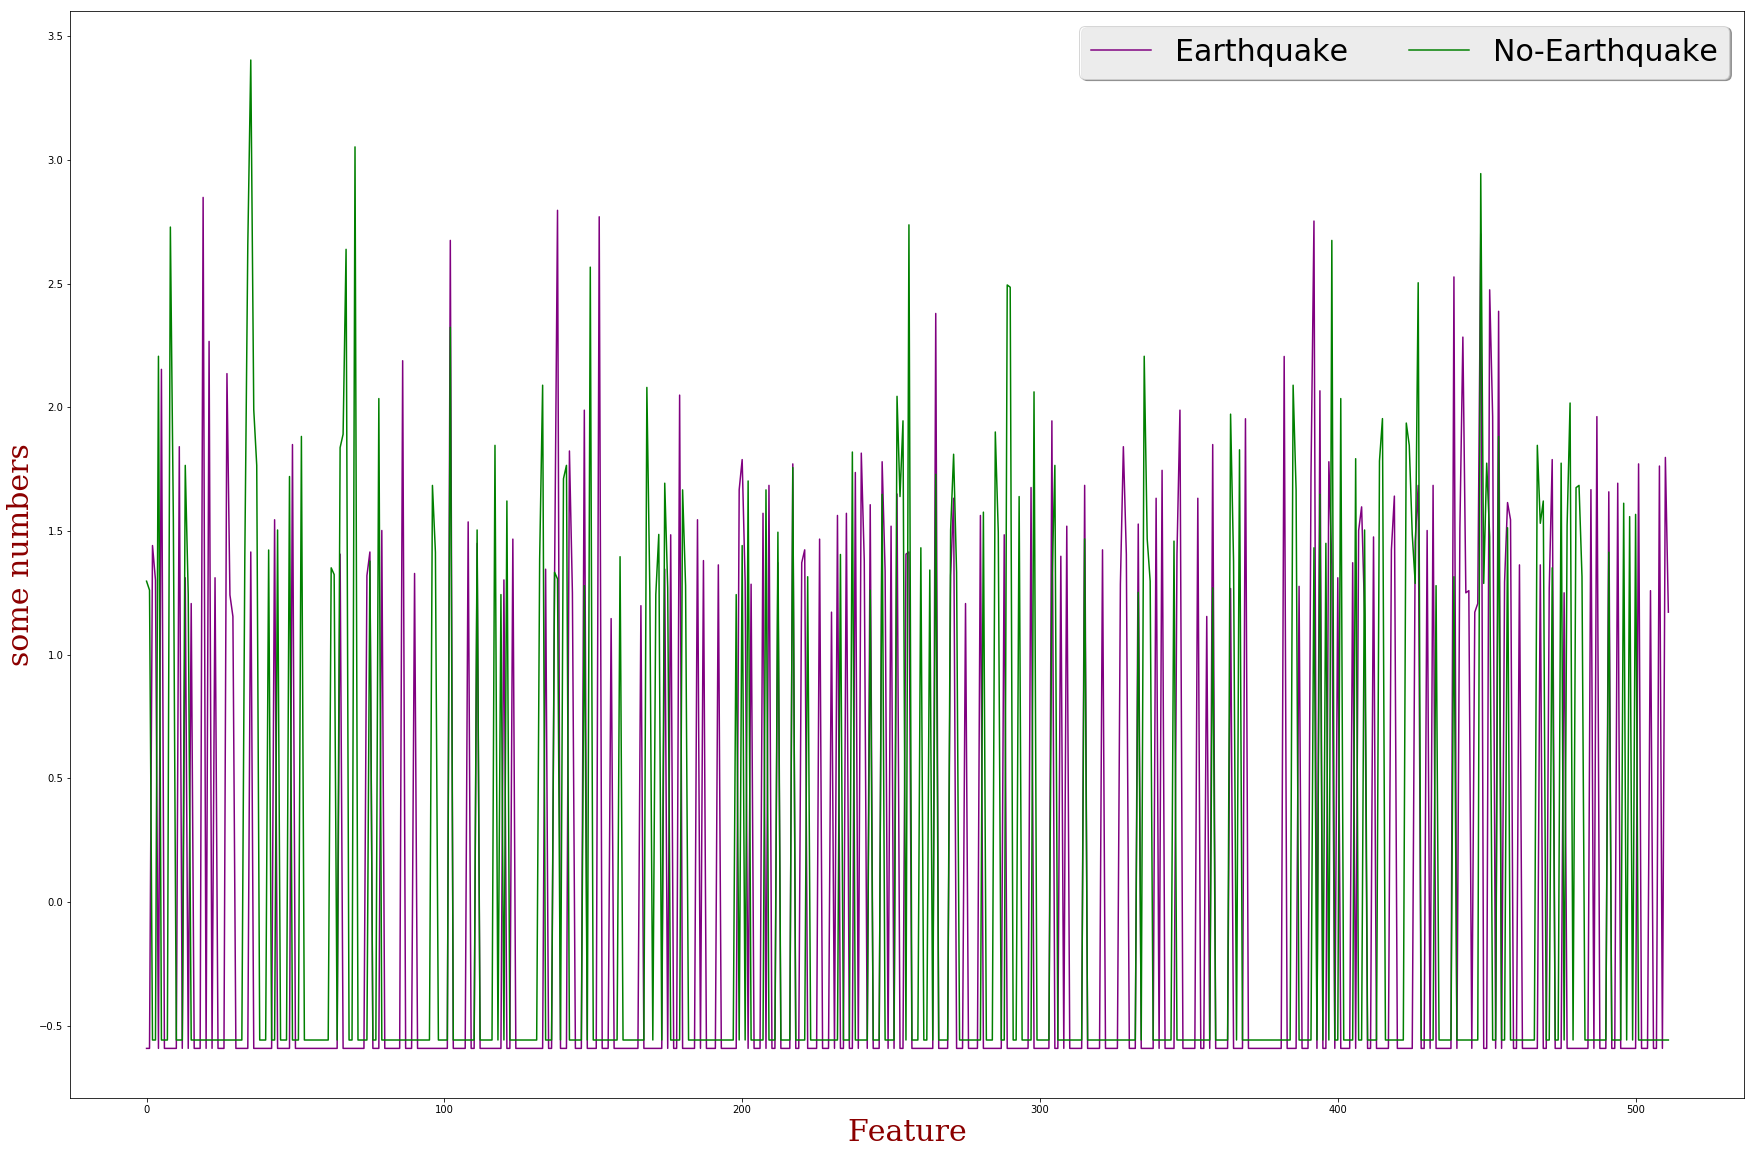

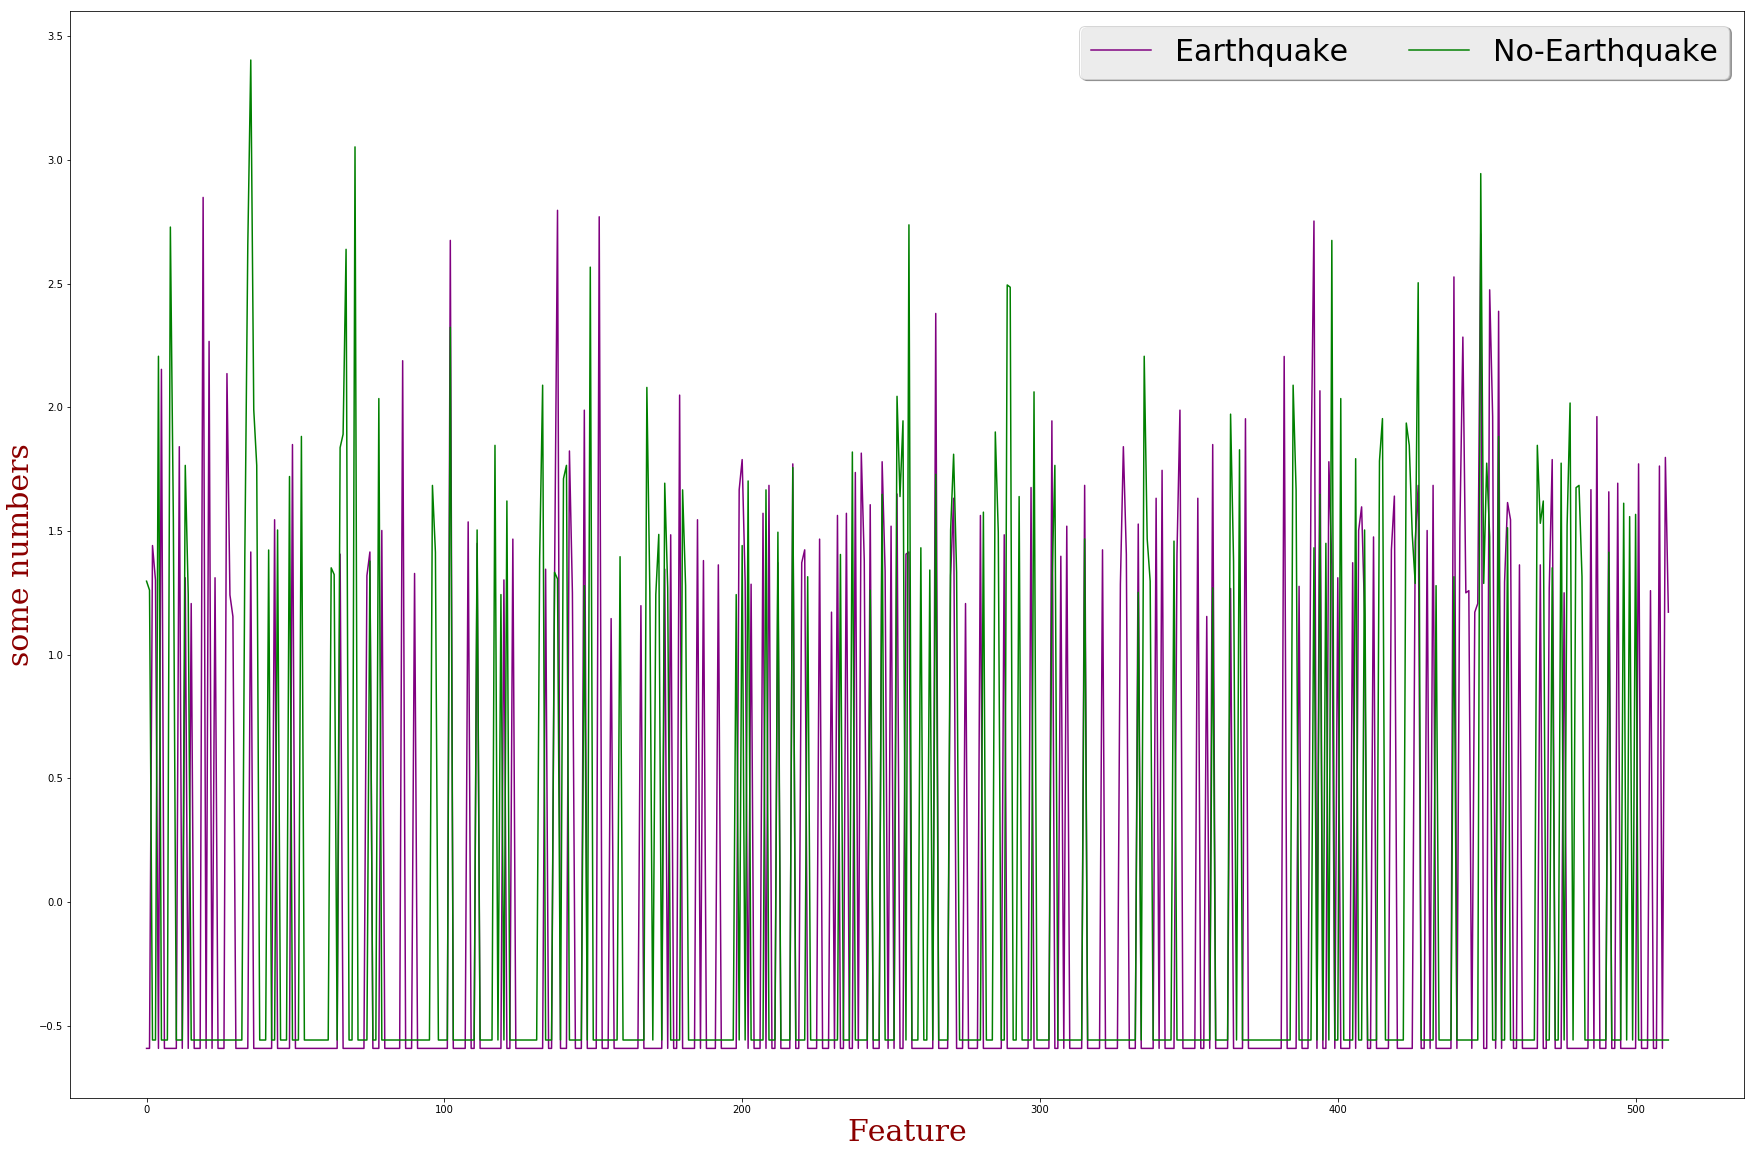

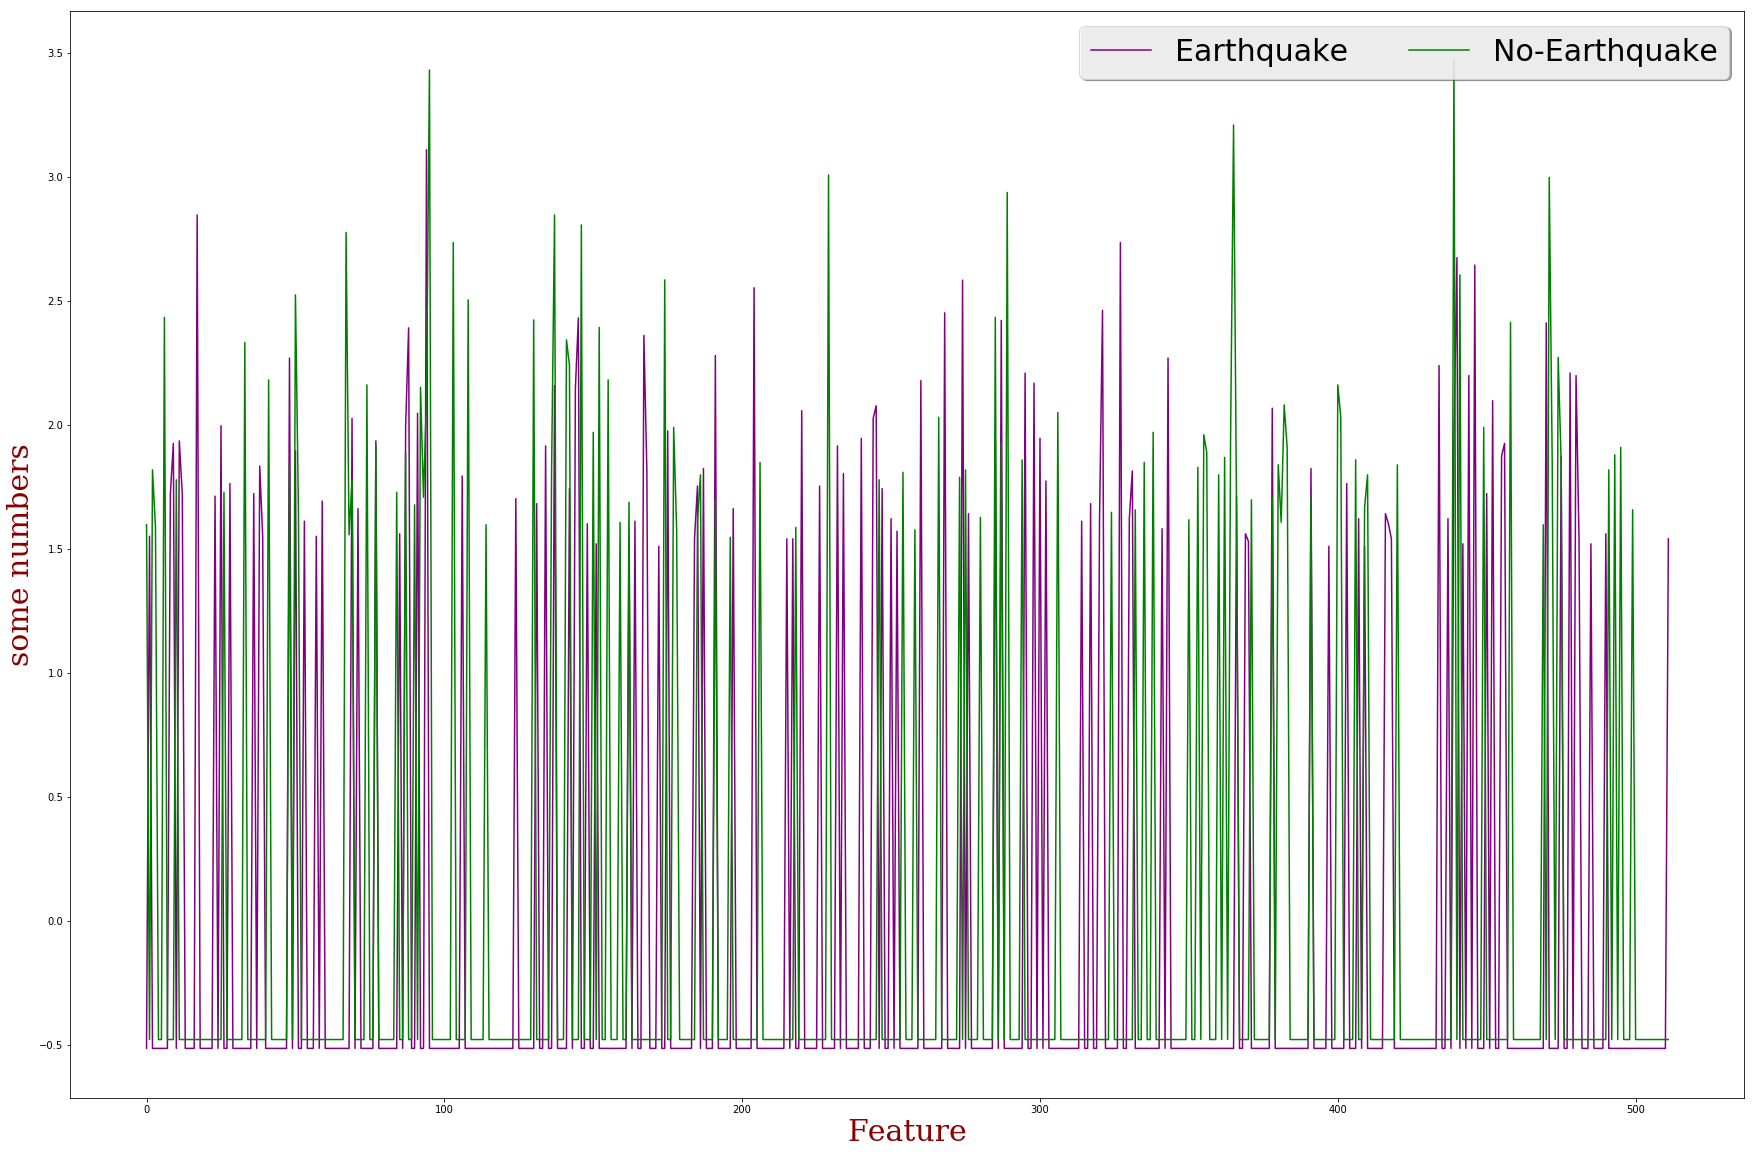

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from random import randint

positive_train = train_data.loc[train_data[512]==1]
positive_train
negative_train = train_data.loc[train_data[512]==0]
negative_train


for i in range(5):
    index = randint(0, min(positive_train.shape[0],negative_train.shape[0])-1)
    row_positive_train = positive_train.iloc[index,:].values.tolist()[:-1]
    row_negative_train = negative_train.iloc[index,:].values.tolist()[:-1]
    figure(figsize=(30,20))
    plt.xlabel('Feature', fontdict=font)
    plt.ylabel('Measurment', fontdict=font)
    plt.plot(row_positive_train,  color='purple', label="Earthquake")
    plt.plot(row_negative_train,  color='Green', label="No-Earthquake")
    leg = plt.legend(loc='upper right', ncol=2, shadow=True, fancybox=True,prop={'size': 30})
    plt.ylabel('some numbers')
    plt.show()

I can't see strong difference between 0 and 1 label. <br>

# Rictor Scale

I read abit about Rictor Scale.<br>
I understand that it's a logarithmic scale.
I dont think the loss fuctions of the out of the box ML algorithms consider this effect (5-3 >> 3-1). <br>
We also need to deal with negative numbers (represent 1/10 as -1 etc.)<br>
Maybe we need to upscale all the mesurments. We'll check it!

# 4. Features vs Features
We will want to know if the features are correlated, so we'll calculate the correlation matrix between all of the 512 features, and print the highest values (The correlation matrix of all of the 512 features are too big ,we cant see any differences). By doing it, we can find more patterns in the data, maybe to collapse few consecutive mesurments into one value or remove some correlated features.

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_data.iloc[:,range(512)].corr()
flat=corr.as_matrix().flatten()
print("Highest feature correlation is: ",np.sort(flat)[-513]) # There are 512 1's because each feature is correlated with itself.

# if you want to print correlation matrix undomment this:
# figure(figsize=(30,20))
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)
#plt.show()

Highest feature correlation is:  0.3106630831281946


0.3 is not that high correlation between features

# 5. Features, describe yourselfs!
To better understand the features, we will print a boxplot for each feature. This way we can see if the data is currupted with noisy measurments, understand the scale of each feature and identify outliers.

Box plot is the very meaningfull representation of statistics about data. <br>
It's great way to see how every feature "behaves".
For example, we can see the extream values and indentify if some of the data is currupted (too high or too low mesurments).<br>
In addition, it a good starting position for outliers detection. (every thing higher then 1.5*IQR start to be suspicous as an outlier, but we need forther gudge some of the cases)

For better visibility, for each 50 features we will print two plots. First contain boxplots for each feature. The second containes a single boxplot represent outliers from these 50 features.
X - feature number, Y - Measurment value, Circles - outliers.


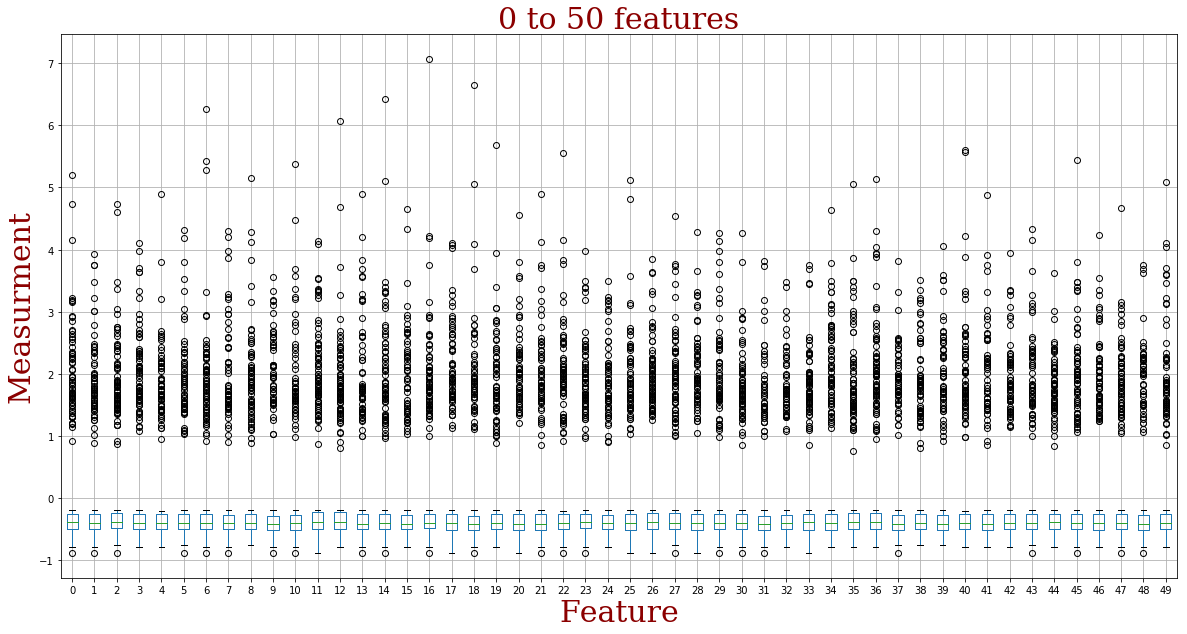

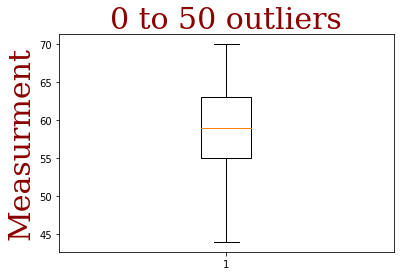

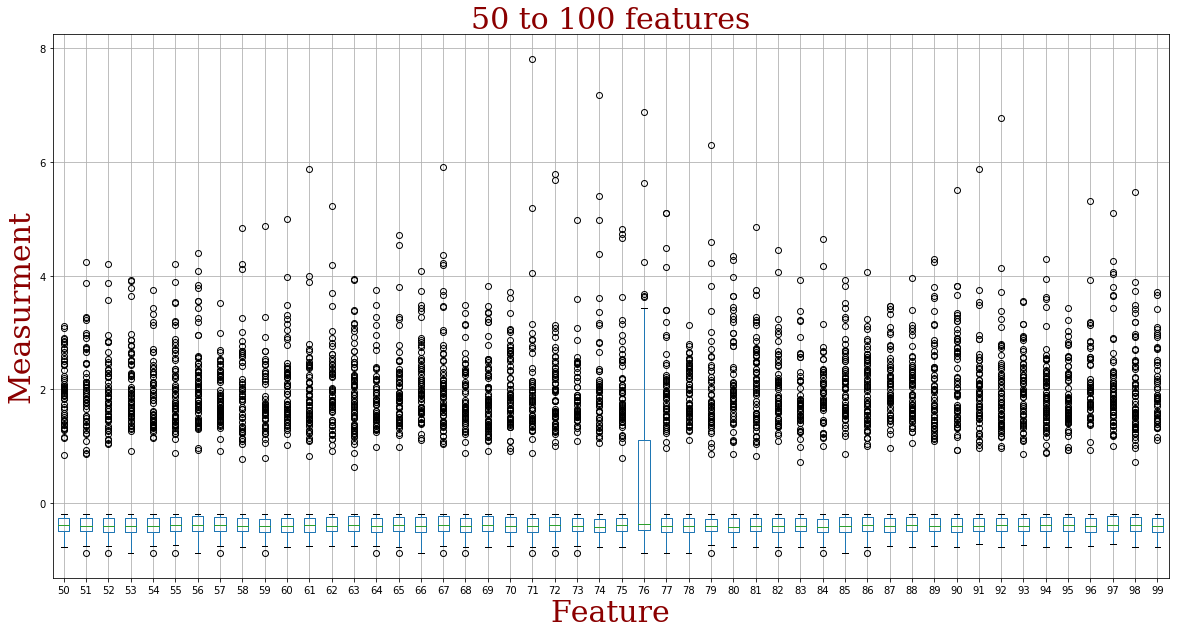

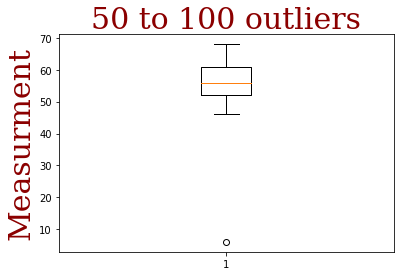

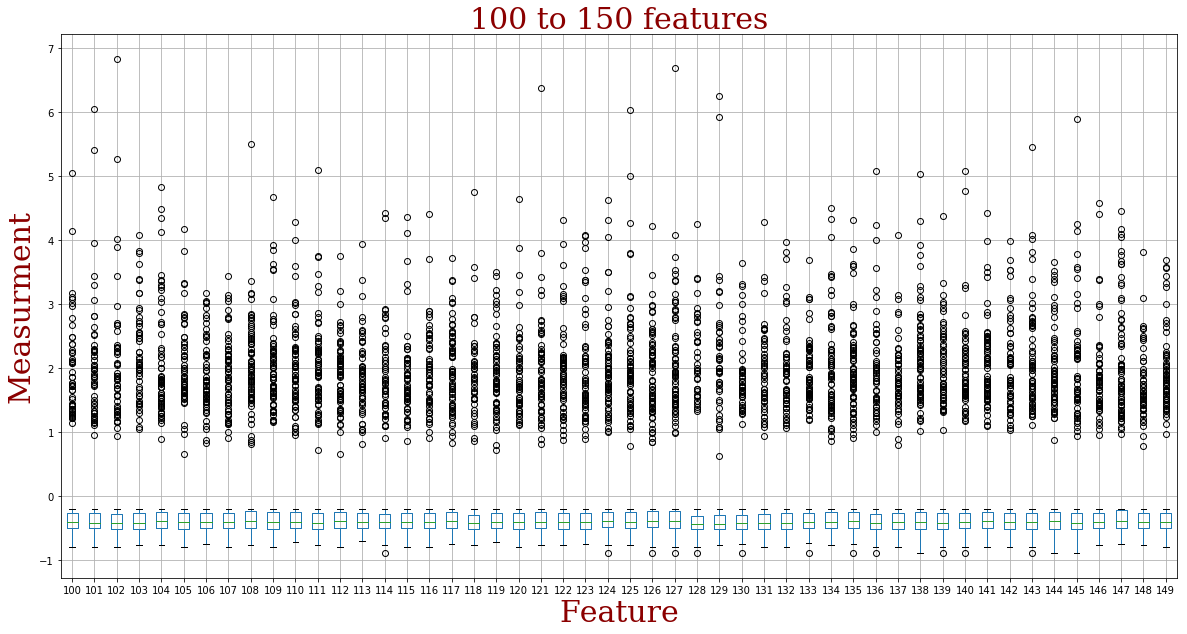

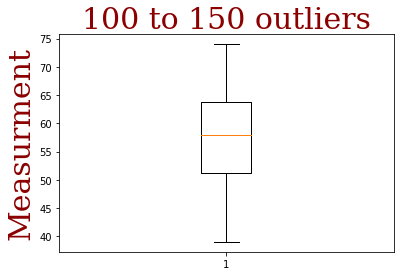

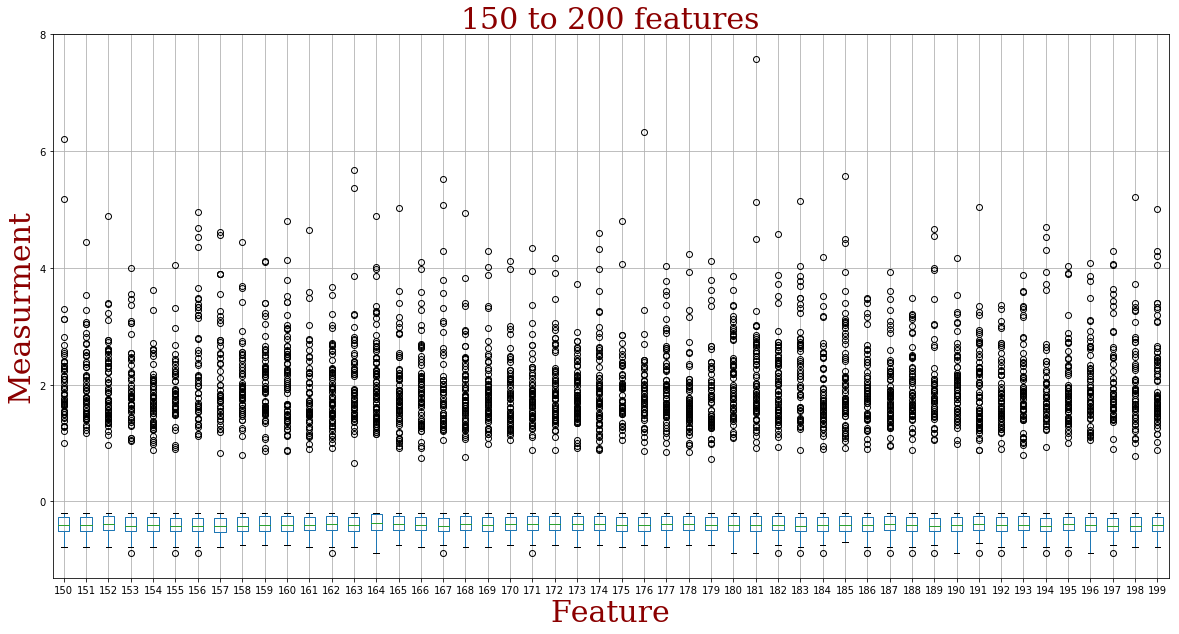

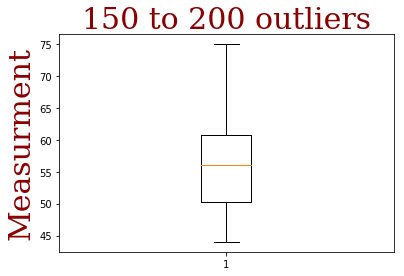

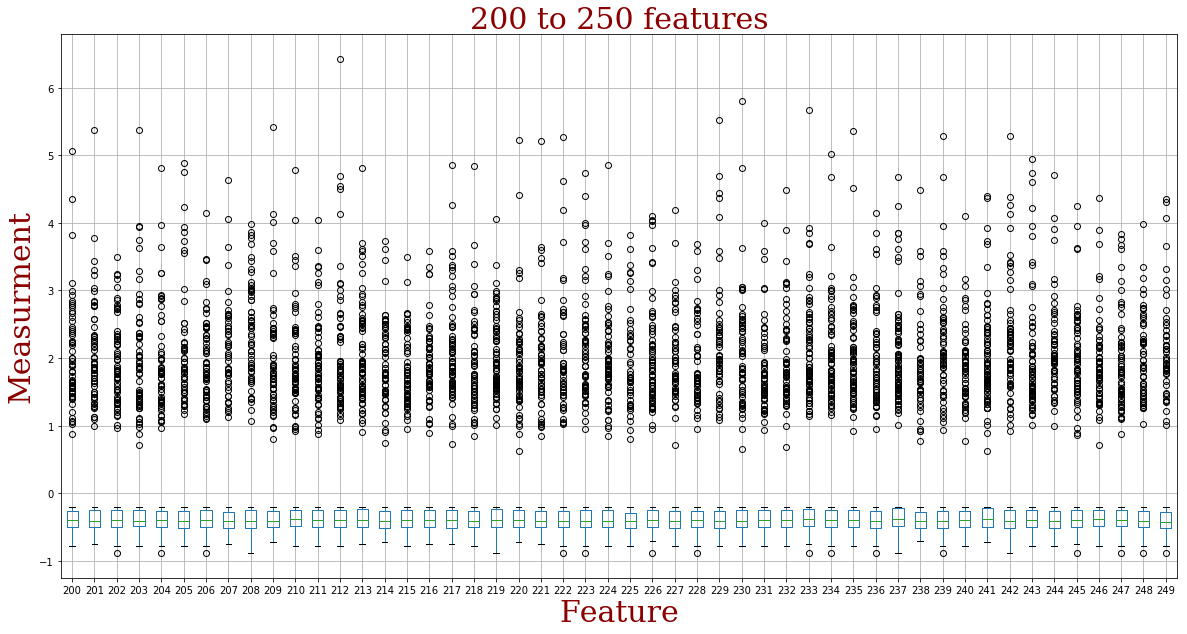

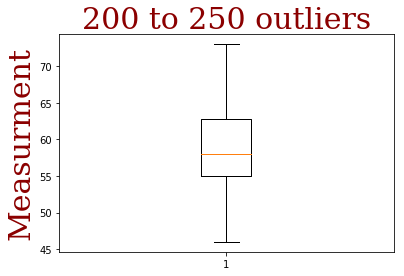

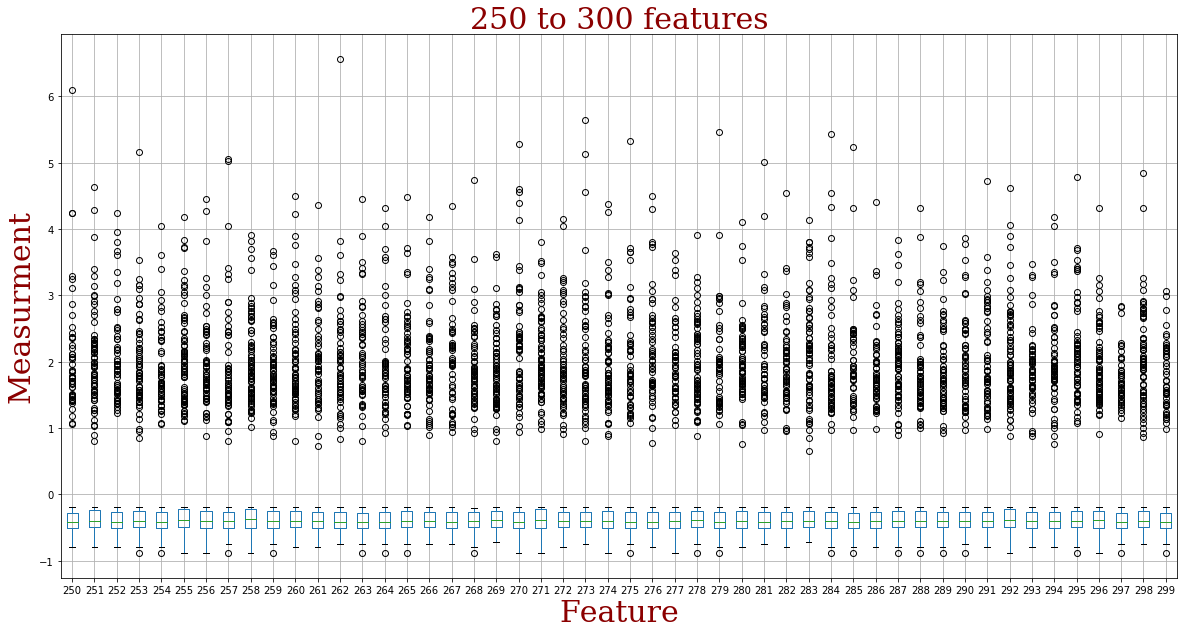

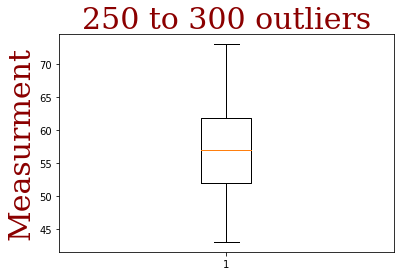

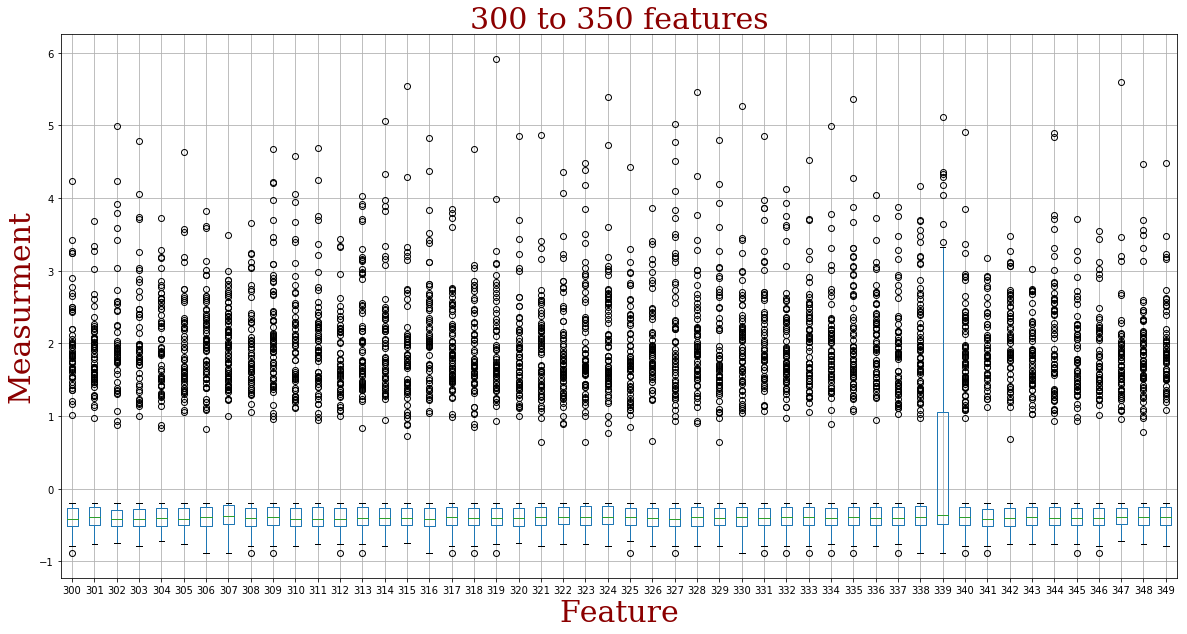

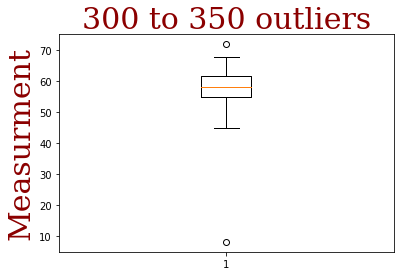

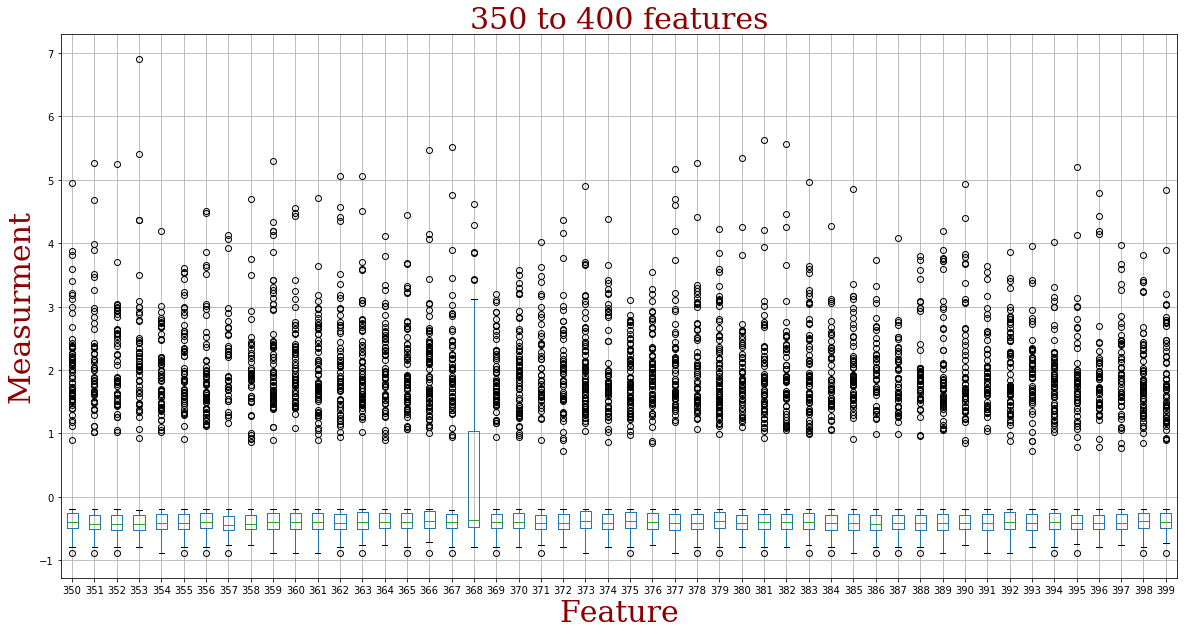

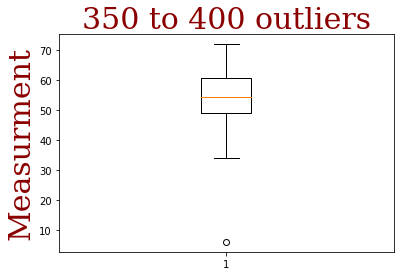

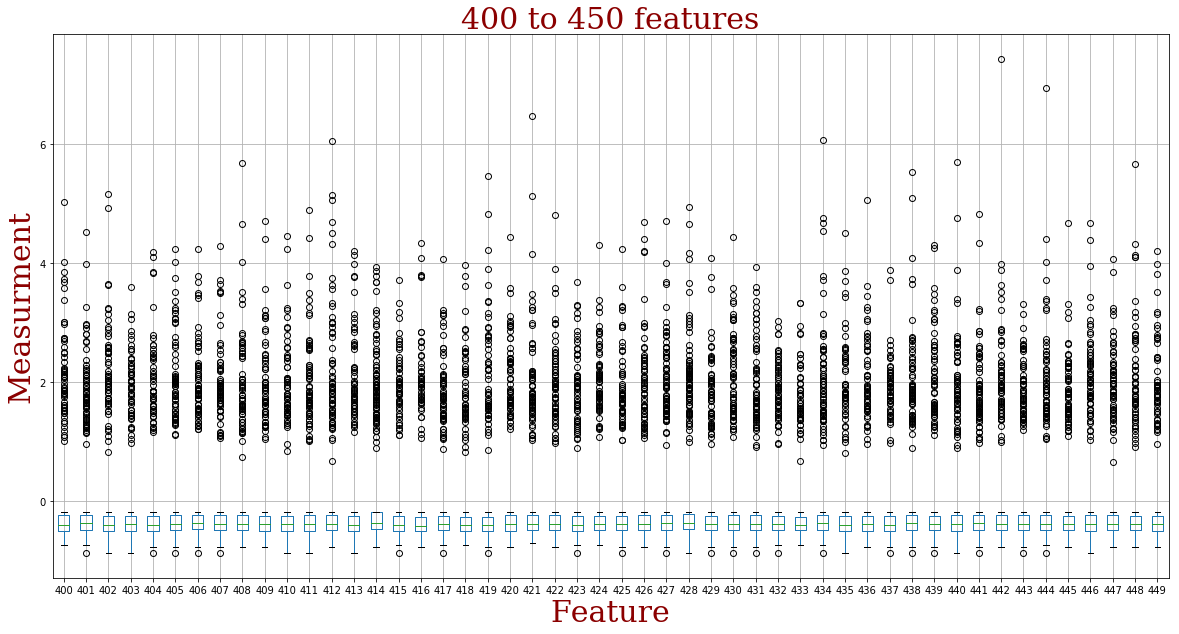

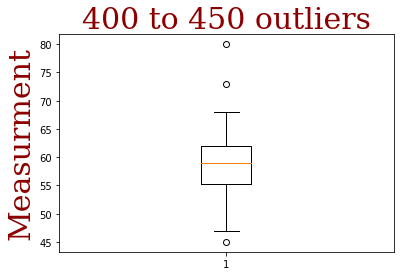

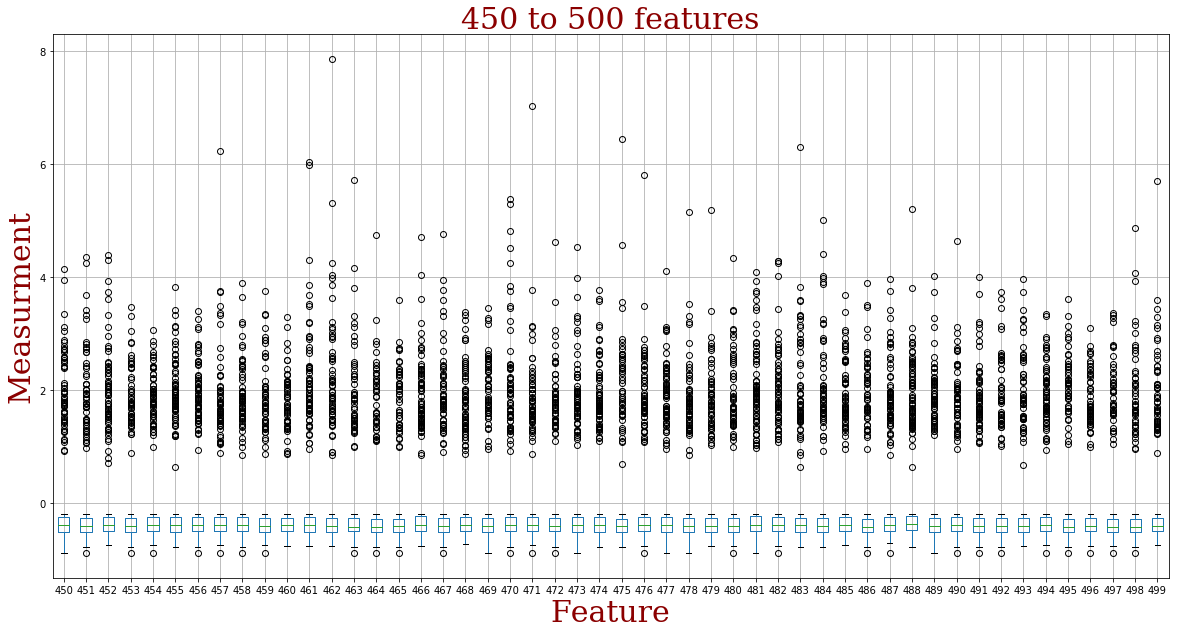

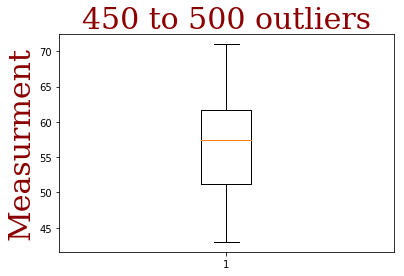

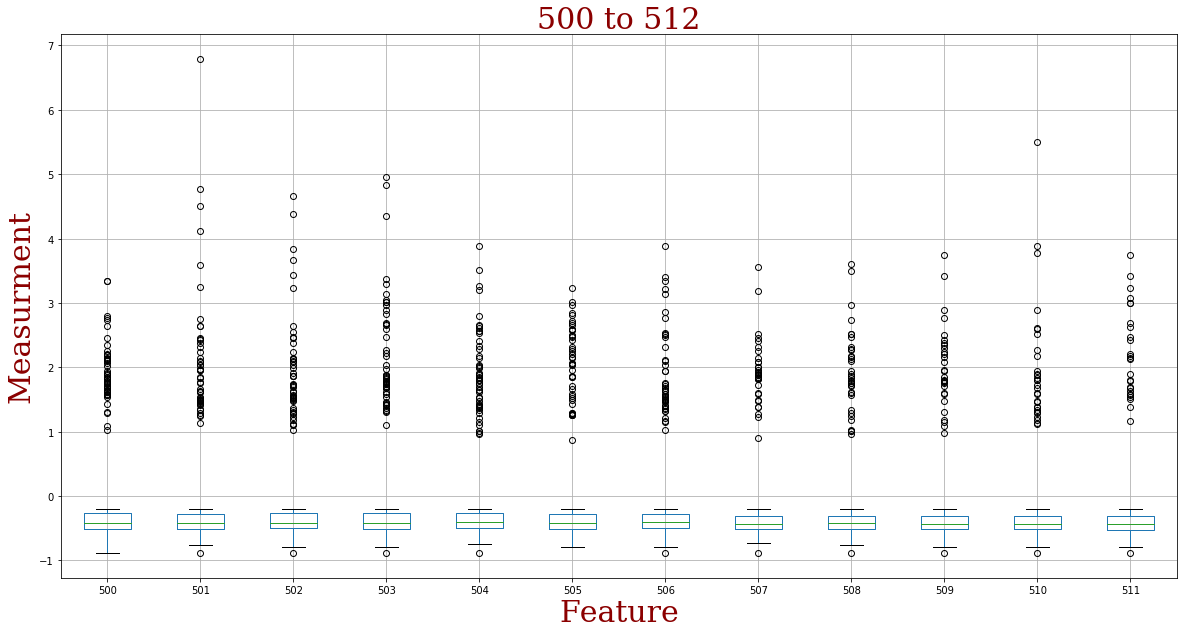

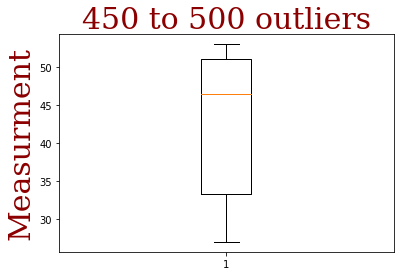

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


for i in range(0,500,50):
    cols_range = range(i,i+50)
    fig, ax = plt.subplots(figsize=(20,  10))
    _, bp = train_data.iloc[:,cols_range].boxplot(list(cols_range),return_type='both')
    plt.title("%d to %d features"%(i,i+50), fontdict=font)
    plt.xlabel('Feature', fontdict=font)
    plt.ylabel('Measurment', fontdict=font)
    plt.show()
    
    # print boxplot of outliers
    outliers = [flier.get_ydata() for flier in bp["fliers"]]
    plt.boxplot([len(li) for li in outliers])
    plt.title("%d to %d outliers"%(i,i+50), fontdict=font)
#     plt.xlabel('outliers', fontdict=font)
    plt.ylabel('Measurment', fontdict=font)
    plt.show()
    
    
cols_range = range(500,512)
fig, ax = plt.subplots(figsize=(20,  10))
_, bp = train_data.iloc[:,cols_range].boxplot(list(cols_range),return_type='both')
plt.title("%d to %d"%(500,512), fontdict=font)
plt.xlabel('Feature', fontdict=font)
plt.ylabel('Measurment', fontdict=font)
plt.show()

# print boxplot of outliers
outliers = [flier.get_ydata() for flier in bp["fliers"]]
plt.boxplot([len(li) for li in outliers])
plt.title("%d to %d outliers"%(i,i+50), fontdict=font)
#     plt.xlabel('outliers', fontdict=font)
plt.ylabel('Measurment', fontdict=font)
plt.show()

We can see that the data is stationaty (the means and stds are the same for most of the featurs).

We can see that there is alot of outliers. (avarage of ~50 outliers out of ~300 in train set is pretty high) <br>
We aren't domain experts, so we don't sure how what is the best way to treat them. <br>
Maybe we can try to see what happends when we remove,cap(all above\below some max\min value are the same),transform them.

We can see that there are no extreme cases (like measurment with a value of more the 20), means our data if not corrupted and there is no problem with the sensors.<br>
We can see that some of the featurehave wider boxplot (like feature 76). Maybe it can become important.

# 6. Can we finally start playing with ML???
Now when we have better understanding of the data, we will apply some out of the box machine learning algorithms.

## Split to features and labels

In [21]:
X_train = train_data.iloc[:,range(0,512)]
y_train = train_data.iloc[:,512]

X_test = test_data.iloc[:,range(0,512)]
y_test = test_data.iloc[:,512]

# Try out of the box ML models

I'll apply some ML classifers from sklearn python library for ML. <br>
All of them are set with default parameters, we just want to feel the results.

The below code will iterate over some classifiers, fit on train set, predict on test set. Then it will print all the mesurments (accuracy, presision, recall, f1), and the confusion matrix for each classifier. <br>
With the confusion matrix its easy to see the mistakes the model make on each class.

In our case, because the classes are imbalanced, it will not be usefull to look only for high accuracy. This way, the model can learn to predict one class, and will get goot accuracy results. This is not a good classifier.

In our case, I'm not sure if we would like our model to:
    1. Predict earthquakes with high precision, means to correctly predict all the earthquakes. This can result high false positive predictions. (Imagine every prediction will result the evacuation of all the people in the building)
    2. When predicting an earthquake, it will be correct with high probability.  We wouldn't want many False-negative
    
F1 measure is some weighed combination of both precistion and recall. In our case, it will be more meaningfull than accuracy.

### Results:
We can see that some of the models has very high recall but very low presicision (RBF SVM, always predict 0) (make sense, the classes are imbalanced and some of the models get good results by only prediction one class).

AdaBoost is the best out of the box classifier. All of it's measures are the highest 0.72 precision, 0.76 recall, 0.72 f1 and 0.75 acc. In addition, it's doesn't predict only one class. <br>
0.75% is also the highes accuracy on this test set by the website we linked in the top of this notebook.

We can see that Gaussian Process has very similar scores as Adaboost. It has   0.7482 acc, 0.71 precision, 0.75 recall and 0.71 f1. And also doesn't predict one class.


In [16]:
# I'm ignoring warnings to make things to be printed more nicely.
# I read all the warnings, all of them doesn't harm the results. just sklearn notifications.
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"


Automatically created module for IPython interactive environment
##############################  Classifier:  Nearest Neighbors , Accuracy:  0.7338129496402878 ##############################
             precision    recall  f1-score   support

          0       0.75      0.97      0.85       104
          1       0.25      0.03      0.05        35

avg / total       0.62      0.73      0.65       139

Confusion matrix, without normalization
[[101   3]
 [ 34   1]]
Normalized confusion matrix
[[0.97 0.03]
 [0.97 0.03]]


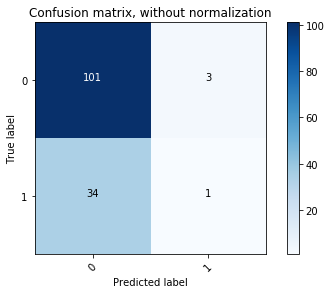

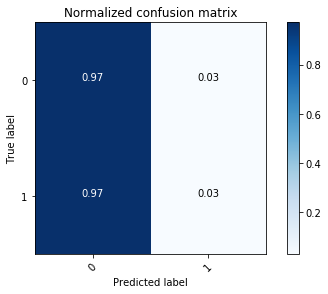

##############################  Classifier:  Linear SVM , Accuracy:  0.6402877697841727 ##############################
             precision    recall  f1-score   support

          0       0.75      0.79      0.77       104
          1       0.24      0.20      0.22        35

avg / total       0.62      0.64      0.63       139

Confusion matrix, without normalization
[[82 22]
 [28  7]]
Normalized confusion matrix
[[0.79 0.21]
 [0.8  0.2 ]]


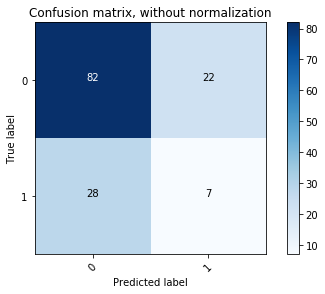

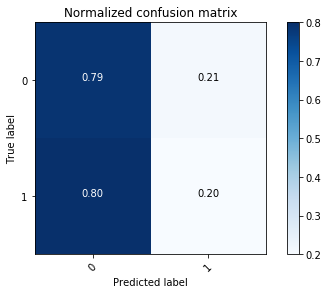

##############################  Classifier:  RBF SVM , Accuracy:  0.7482014388489209 ##############################
             precision    recall  f1-score   support

          0       0.75      1.00      0.86       104
          1       0.00      0.00      0.00        35

avg / total       0.56      0.75      0.64       139

Confusion matrix, without normalization
[[104   0]
 [ 35   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


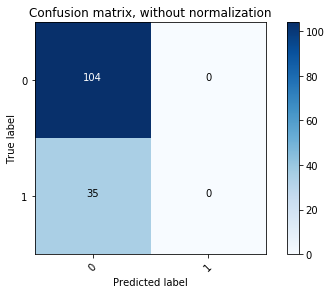

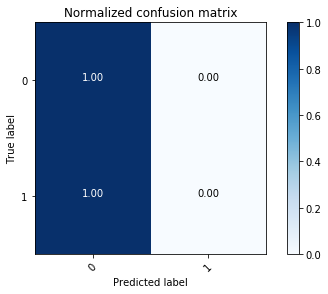

##############################  Classifier:  Gaussian Process , Accuracy:  0.7482014388489209 ##############################
             precision    recall  f1-score   support

          0       0.78      0.92      0.85       104
          1       0.50      0.23      0.31        35

avg / total       0.71      0.75      0.71       139

Confusion matrix, without normalization
[[96  8]
 [27  8]]
Normalized confusion matrix
[[0.92 0.08]
 [0.77 0.23]]


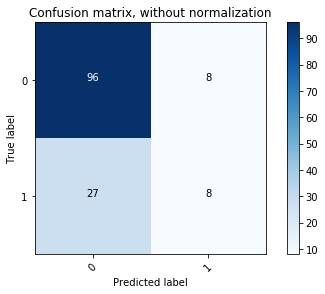

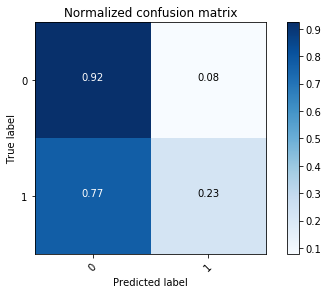

##############################  Classifier:  Decision Tree , Accuracy:  0.6834532374100719 ##############################
             precision    recall  f1-score   support

          0       0.75      0.86      0.80       104
          1       0.29      0.17      0.21        35

avg / total       0.64      0.68      0.65       139

Confusion matrix, without normalization
[[89 15]
 [29  6]]
Normalized confusion matrix
[[0.86 0.14]
 [0.83 0.17]]


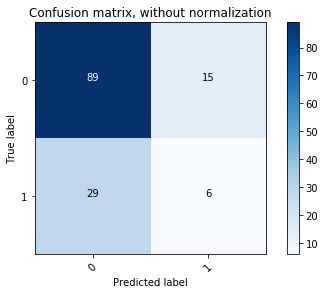

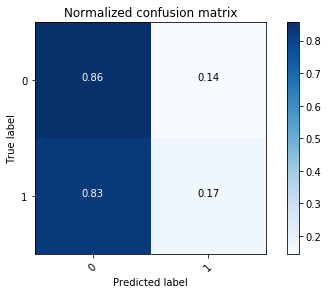

##############################  Classifier:  Random Forest , Accuracy:  0.7482014388489209 ##############################
             precision    recall  f1-score   support

          0       0.75      1.00      0.86       104
          1       0.00      0.00      0.00        35

avg / total       0.56      0.75      0.64       139

Confusion matrix, without normalization
[[104   0]
 [ 35   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


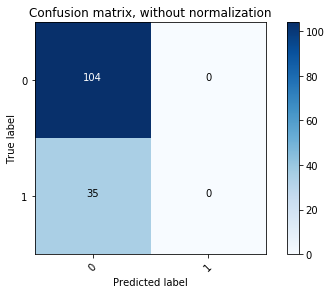

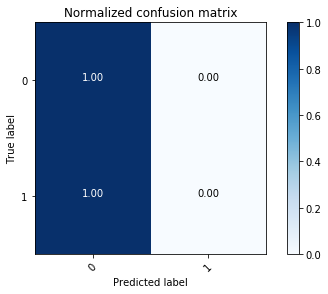

##############################  Classifier:  Neural Net , Accuracy:  0.7122302158273381 ##############################
             precision    recall  f1-score   support

          0       0.76      0.89      0.82       104
          1       0.35      0.17      0.23        35

avg / total       0.66      0.71      0.67       139

Confusion matrix, without normalization
[[93 11]
 [29  6]]
Normalized confusion matrix
[[0.89 0.11]
 [0.83 0.17]]


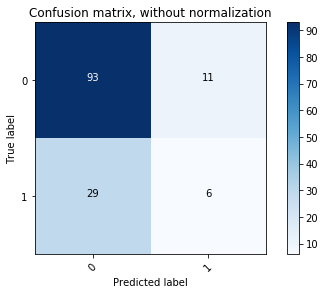

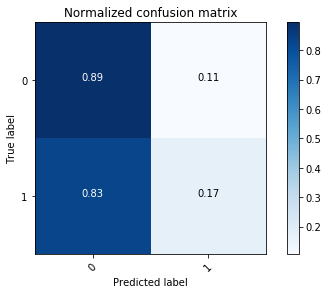

##############################  Classifier:  AdaBoost , Accuracy:  0.7553956834532374 ##############################
             precision    recall  f1-score   support

          0       0.79      0.92      0.85       104
          1       0.53      0.26      0.35        35

avg / total       0.72      0.76      0.72       139

Confusion matrix, without normalization
[[96  8]
 [26  9]]
Normalized confusion matrix
[[0.92 0.08]
 [0.74 0.26]]


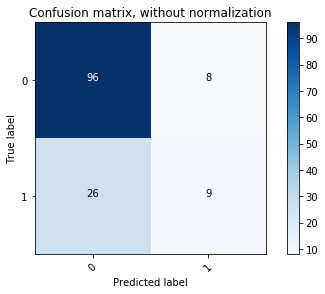

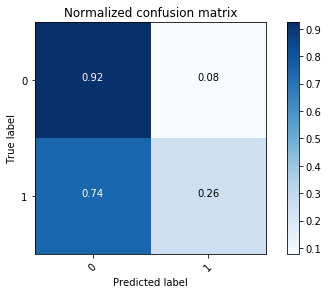

##############################  Classifier:  Naive Bayes , Accuracy:  0.6762589928057554 ##############################
             precision    recall  f1-score   support

          0       0.77      0.81      0.79       104
          1       0.33      0.29      0.31        35

avg / total       0.66      0.68      0.67       139

Confusion matrix, without normalization
[[84 20]
 [25 10]]
Normalized confusion matrix
[[0.81 0.19]
 [0.71 0.29]]


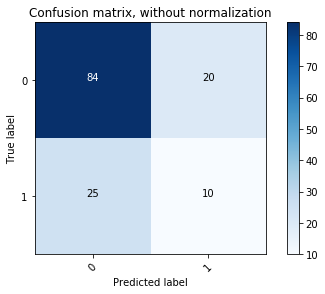

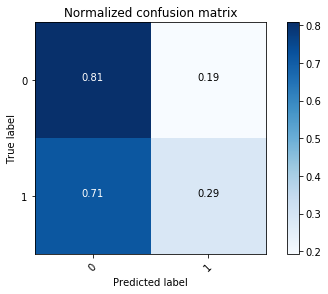

##############################  Classifier:  QDA , Accuracy:  0.3237410071942446 ##############################
             precision    recall  f1-score   support

          0       0.68      0.18      0.29       104
          1       0.23      0.74      0.36        35

avg / total       0.57      0.32      0.31       139

Confusion matrix, without normalization
[[19 85]
 [ 9 26]]
Normalized confusion matrix
[[0.18 0.82]
 [0.26 0.74]]


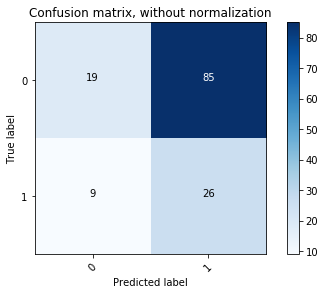

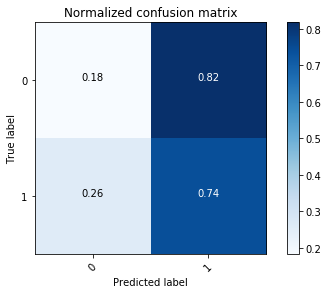

In [103]:
print(__doc__)


import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


# Some helper function to nicly print confusion matrixes
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        
        
def run_sklean_expiraments(X_train,y_train,X_test,y_test,clasifiers_to_remove=[]):
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]
    names = [x for x in names if x not in clasifiers_to_remove]
    
    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]


    # iterate over classifiers
    for name, clf in zip(names, classifiers):
            y_pred = clf.fit(X_train, y_train).predict(X_test)
            score = clf.score(X_test, y_test)
            print("#"*30," Classifier: ",name,", Accuracy: ",score, "#"*30)
            print(classification_report(y_test,y_pred))

            # Compute confusion matrix
            cnf_matrix = confusion_matrix(y_test, y_pred)
            np.set_printoptions(precision=2)

            # Plot non-normalized confusion matrix
            plt.figure()
            plot_confusion_matrix(cnf_matrix, classes=[0,1],
                                  title='Confusion matrix, without normalization')

            # Plot normalized confusion matrix
            plt.figure()
            plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                                  title='Normalized confusion matrix')

            plt.show()
            
run_sklean_expiraments(X_train,y_train,X_test,y_test)

# 7. It's all about perspective 
After investigating the ML results, we will try to improve them by appling transformations (Standardize features, Furie transformation, upsampling, undersampling) on the data and apply the previous ML algorithms again and investigate the results.

# Transformation - Standardize features

Even though all our measurment are in log scale, we will try to apply standartization on the measurments and then apply the classifiers.
Standardize features by removing the mean and scaling to unit variance

<b>Important:</b> When doing standartization on the values, we will learn the standart disribution on train, and then transform the trand <b> and the test </b> by the same scale. 
This way we aren't cheeting by knowing the test distribution and scale.

### Results:
We can see that almost all classifiers got better scores. It actually helped!

For example:
    1. Nearest Neighbors got from 69% accuracy to 73%.
    2. Gaussian Process from 71% to 74.82% without predicting only one class (74.82% is usually the accuracy for predicting one class, like RBF SVM)

We still couldn't pass 75% accuracy, and still the highest percision, recall, and f1 are the same as without transformation and still belong to Agadrad classifier.

We can notice that some classifiers always predict 0. Probably because most of the labels are 0.

##############################  Classifier:  Nearest Neighbors , Accuracy:  0.7338129496402878 ##############################
             precision    recall  f1-score   support

          0       0.75      0.97      0.85       104
          1       0.25      0.03      0.05        35

avg / total       0.62      0.73      0.65       139

Confusion matrix, without normalization
[[101   3]
 [ 34   1]]
Normalized confusion matrix
[[0.97 0.03]
 [0.97 0.03]]


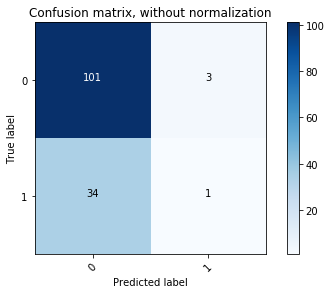

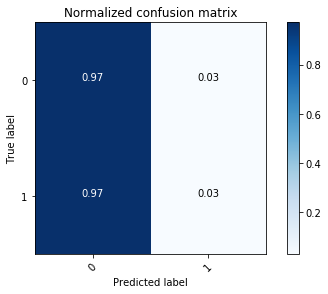

##############################  Classifier:  Linear SVM , Accuracy:  0.6402877697841727 ##############################
             precision    recall  f1-score   support

          0       0.75      0.79      0.77       104
          1       0.24      0.20      0.22        35

avg / total       0.62      0.64      0.63       139

Confusion matrix, without normalization
[[82 22]
 [28  7]]
Normalized confusion matrix
[[0.79 0.21]
 [0.8  0.2 ]]


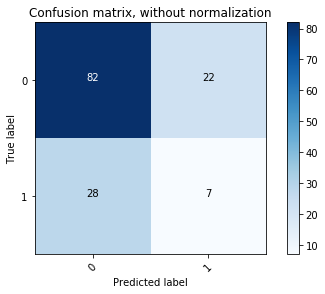

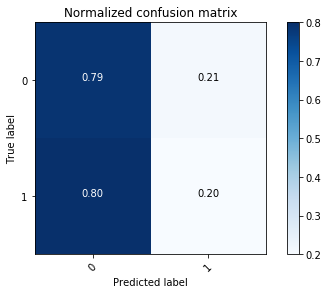

##############################  Classifier:  RBF SVM , Accuracy:  0.7482014388489209 ##############################
             precision    recall  f1-score   support

          0       0.75      1.00      0.86       104
          1       0.00      0.00      0.00        35

avg / total       0.56      0.75      0.64       139

Confusion matrix, without normalization
[[104   0]
 [ 35   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


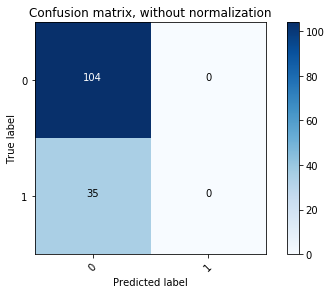

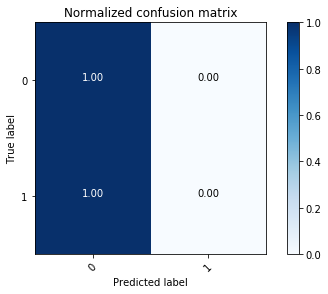

##############################  Classifier:  Gaussian Process , Accuracy:  0.7482014388489209 ##############################
             precision    recall  f1-score   support

          0       0.78      0.92      0.85       104
          1       0.50      0.23      0.31        35

avg / total       0.71      0.75      0.71       139

Confusion matrix, without normalization
[[96  8]
 [27  8]]
Normalized confusion matrix
[[0.92 0.08]
 [0.77 0.23]]


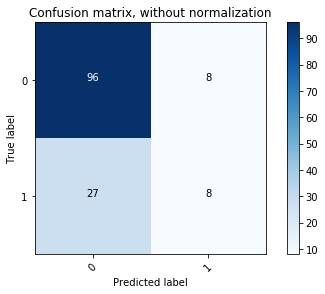

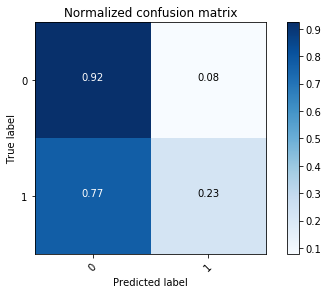

##############################  Classifier:  Decision Tree , Accuracy:  0.697841726618705 ##############################
             precision    recall  f1-score   support

          0       0.76      0.87      0.81       104
          1       0.33      0.20      0.25        35

avg / total       0.65      0.70      0.67       139

Confusion matrix, without normalization
[[90 14]
 [28  7]]
Normalized confusion matrix
[[0.87 0.13]
 [0.8  0.2 ]]


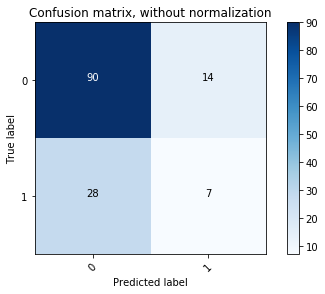

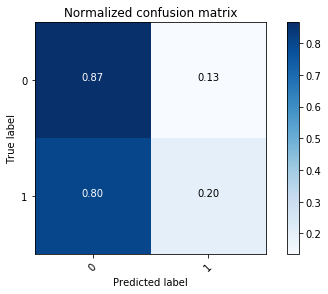

##############################  Classifier:  Random Forest , Accuracy:  0.7410071942446043 ##############################
             precision    recall  f1-score   support

          0       0.75      0.99      0.85       104
          1       0.00      0.00      0.00        35

avg / total       0.56      0.74      0.64       139

Confusion matrix, without normalization
[[103   1]
 [ 35   0]]
Normalized confusion matrix
[[0.99 0.01]
 [1.   0.  ]]


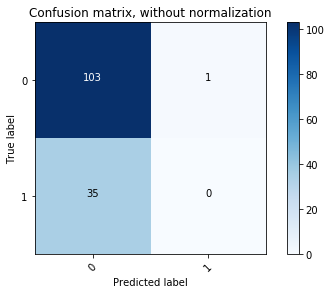

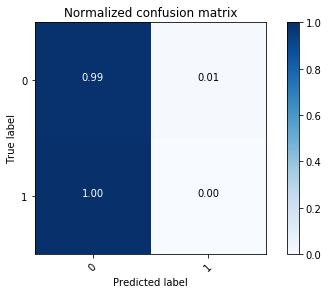

##############################  Classifier:  Neural Net , Accuracy:  0.7050359712230215 ##############################
             precision    recall  f1-score   support

          0       0.76      0.88      0.82       104
          1       0.33      0.17      0.23        35

avg / total       0.65      0.71      0.67       139

Confusion matrix, without normalization
[[92 12]
 [29  6]]
Normalized confusion matrix
[[0.88 0.12]
 [0.83 0.17]]


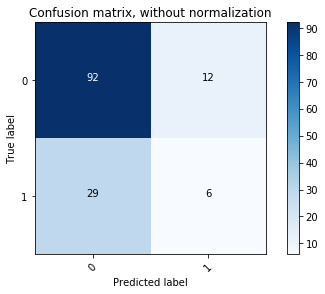

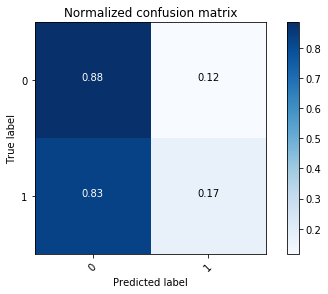

##############################  Classifier:  AdaBoost , Accuracy:  0.7553956834532374 ##############################
             precision    recall  f1-score   support

          0       0.79      0.92      0.85       104
          1       0.53      0.26      0.35        35

avg / total       0.72      0.76      0.72       139

Confusion matrix, without normalization
[[96  8]
 [26  9]]
Normalized confusion matrix
[[0.92 0.08]
 [0.74 0.26]]


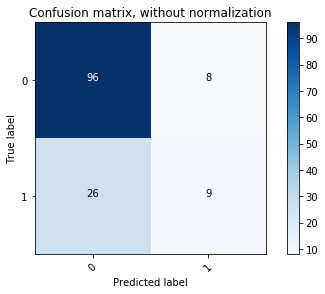

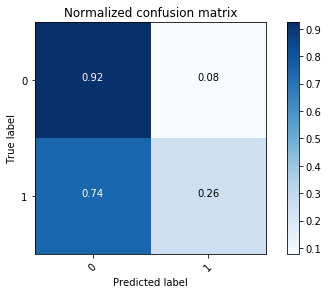

##############################  Classifier:  Naive Bayes , Accuracy:  0.6762589928057554 ##############################
             precision    recall  f1-score   support

          0       0.77      0.81      0.79       104
          1       0.33      0.29      0.31        35

avg / total       0.66      0.68      0.67       139

Confusion matrix, without normalization
[[84 20]
 [25 10]]
Normalized confusion matrix
[[0.81 0.19]
 [0.71 0.29]]


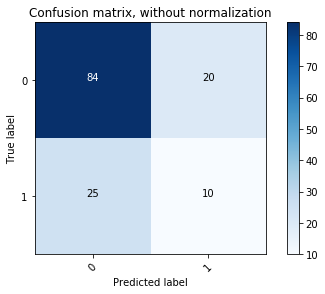

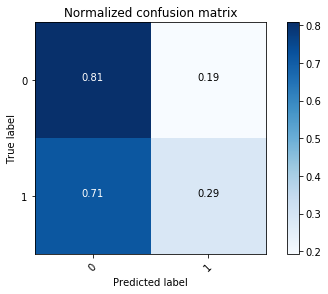

##############################  Classifier:  QDA , Accuracy:  0.3237410071942446 ##############################
             precision    recall  f1-score   support

          0       0.68      0.18      0.29       104
          1       0.23      0.74      0.36        35

avg / total       0.57      0.32      0.31       139

Confusion matrix, without normalization
[[19 85]
 [ 9 26]]
Normalized confusion matrix
[[0.18 0.82]
 [0.26 0.74]]


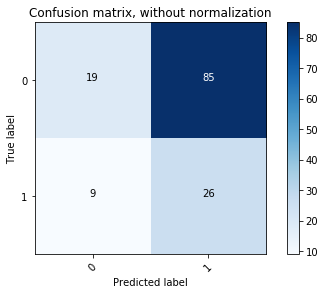

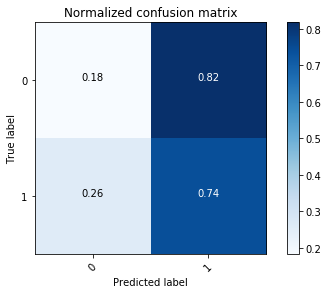

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standartization
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(train_data.iloc[:,range(0,512)].values)
y_train = train_data.iloc[:,512]

X_test = X_scaler.transform(test_data.iloc[:,range(0,512)].values)
y_test = test_data.iloc[:,512]

# keras_X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
# keras_X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

run_sklean_expiraments(X_train,y_train,X_test,y_test)

# Transformation - Fourier transformation
In signal processing, the Fourier transform often takes a time series or a function of continuous time, and maps it into a frequency spectrum. That is, it takes a function from the time domain into the frequency domain

Some of the classifiers had some problems with the transformations, so I ignored them.

### Results:
We can see that some of the classifies like Nearest Neighbors got boost in accuracy (69% to 71%), but most of the classifiers predicted only one class which is bad.

Not that good transformation.

##############################  Classifier:  Nearest Neighbors , Accuracy:  0.7194244604316546 ##############################
             precision    recall  f1-score   support

          0       0.74      0.96      0.84       104
          1       0.00      0.00      0.00        35

avg / total       0.55      0.72      0.63       139

Confusion matrix, without normalization
[[100   4]
 [ 35   0]]
Normalized confusion matrix
[[0.96 0.04]
 [1.   0.  ]]


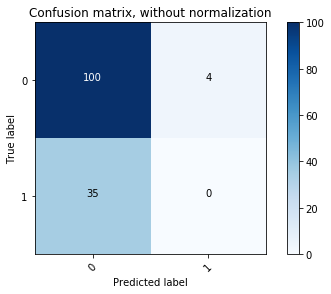

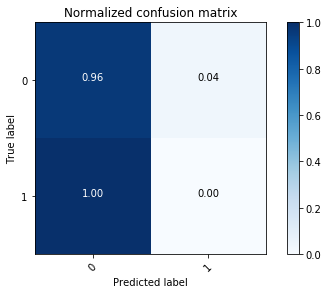

##############################  Classifier:  Linear SVM , Accuracy:  0.6115107913669064 ##############################
             precision    recall  f1-score   support

          0       0.75      0.73      0.74       104
          1       0.24      0.26      0.25        35

avg / total       0.62      0.61      0.62       139

Confusion matrix, without normalization
[[76 28]
 [26  9]]
Normalized confusion matrix
[[0.73 0.27]
 [0.74 0.26]]


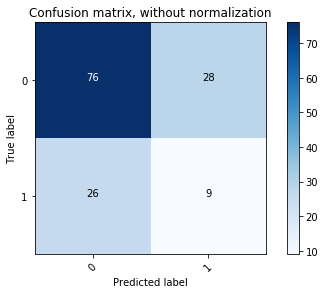

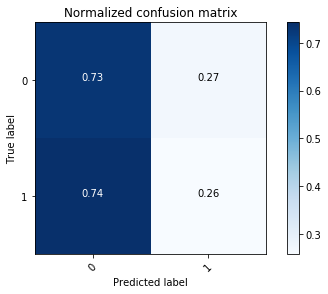

##############################  Classifier:  RBF SVM , Accuracy:  0.7482014388489209 ##############################
             precision    recall  f1-score   support

          0       0.75      1.00      0.86       104
          1       0.00      0.00      0.00        35

avg / total       0.56      0.75      0.64       139

Confusion matrix, without normalization
[[104   0]
 [ 35   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


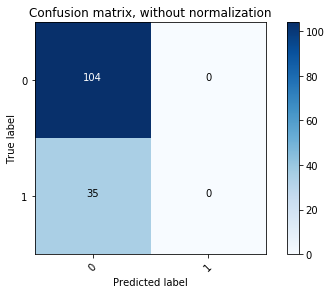

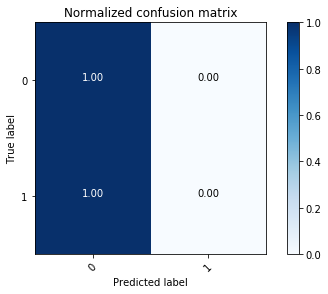

##############################  Classifier:  Gaussian Process , Accuracy:  0.7482014388489209 ##############################
             precision    recall  f1-score   support

          0       0.75      1.00      0.86       104
          1       0.00      0.00      0.00        35

avg / total       0.56      0.75      0.64       139

Confusion matrix, without normalization
[[104   0]
 [ 35   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


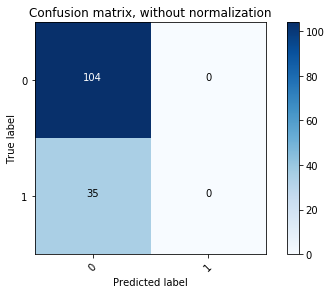

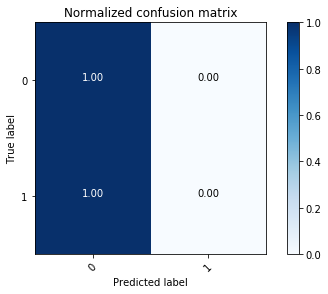

##############################  Classifier:  Decision Tree , Accuracy:  0.7050359712230215 ##############################
             precision    recall  f1-score   support

          0       0.74      0.94      0.83       104
          1       0.00      0.00      0.00        35

avg / total       0.55      0.71      0.62       139

Confusion matrix, without normalization
[[98  6]
 [35  0]]
Normalized confusion matrix
[[0.94 0.06]
 [1.   0.  ]]


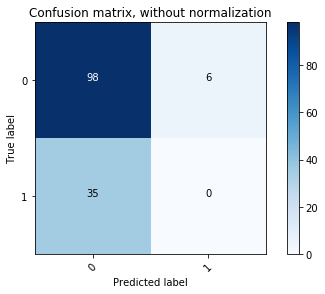

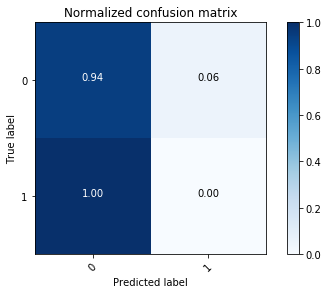

##############################  Classifier:  Random Forest , Accuracy:  0.7482014388489209 ##############################
             precision    recall  f1-score   support

          0       0.75      1.00      0.86       104
          1       0.00      0.00      0.00        35

avg / total       0.56      0.75      0.64       139

Confusion matrix, without normalization
[[104   0]
 [ 35   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


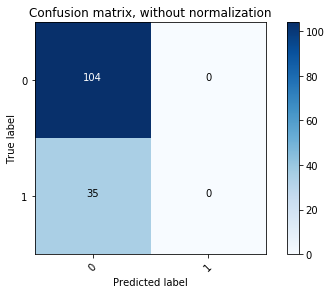

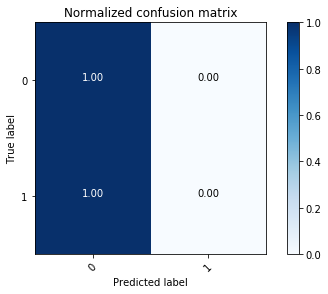

In [105]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import fftpack


X_train = train_data.iloc[:,range(0,512)].values
X_test = test_data.iloc[:,range(0,512)].values

# Fourier transform
X_train = fftpack.fft(X_train)
y_train = train_data.iloc[:,512]

X_test = fftpack.fft(X_test)
y_test = test_data.iloc[:,512]

run_sklean_expiraments(X_train,y_train,X_test,y_test,clasifiers_to_remove=["Neural Net", "AdaBoost","Naive Bayes", "QDA"])

# Try statunare the data

The temporal structure adds an order to the observations. This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically.

For example, when modeling, there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as the time series being stationary.

These assumptions can be easily violated in time series by the addition of a trend, seasonality, and other time-dependent structures.

Can learn more here about stationary data - https://machinelearningmastery.com/time-series-data-stationary-python/
Good explanation about stationary data - https://www.youtube.com/watch?v=K2bK888zGxg&t=1s


# 8. Now some deep learning (LSTM) for the fun
We will use LSTM NN because our data is time series.

I tried many architectures, many hyperparameters. This is the end result, but much more work can be done to optimize it.

### Results:
The network isn't that good, it overfit the train sample, and always predict one class.
I tried to avoid it with many techniques:
    1. Reduce the architecture complexity.
    2. Dropout
    3. Different weight initialization techniques
    4. Different losses and optimizers
    5. weight classes
    
Nothing really worked. Maybe the data is too small.


Prepare the dataset for LSTM network

In [107]:
import numpy as np
X_train = train_data.iloc[:,range(0,512)]
y_train = train_data.iloc[:,512]

X_test = test_data.iloc[:,range(0,512)]
y_test = test_data.iloc[:,512]

keras_X_train = np.reshape(X_train.as_matrix(),(X_train.shape[0],1,X_train.shape[1]))
keras_X_test = np.reshape(X_test.as_matrix(),(X_test.shape[0],1,X_test.shape[1]))

In [108]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras
from keras.optimizers import SGD,Adam


epochs=60
batch_size=32
dropout = 0.4
recurrent_dropout=0.4
# create and fit the LSTM network
look_back = 512
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(1, look_back),
               kernel_initializer='random_normal',
               return_sequences=True,
               dropout=dropout,
               recurrent_dropout=recurrent_dropout))
model.add(LSTM(3,  activation='relu'))
model.add(Dense(1,activation='sigmoid'))


optimizer = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
# optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00001, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc',
                              patience=10,
                              verbose=0, mode='auto')
model.summary()
class_weight = {0: 5.,
                1: 1.}

model.fit(keras_X_train, y_train, 
          validation_split = 0.2,
          epochs=epochs,
          batch_size=batch_size,
          verbose=1,
          class_weight=class_weight,
          callbacks=[early_stopping])

score, acc = model.evaluate(keras_X_test, y_test, batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)

rounded_predictions = model.predict_classes(keras_X_test, batch_size=1,verbose=1)
[i for i in rounded_predictions if i==1]

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 4)              8272      
_________________________________________________________________
lstm_2 (LSTM)                (None, 3)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 8,372
Trainable params: 8,372
Non-trainable params: 0
_________________________________________________________________
Train on 257 samples, validate on 65 samples
Epoch 1/60
257/257 [==============================] - 14s 56ms/step - loss: 1.5631 - acc: 0.8093 - val_loss: 0.6313 - val_acc: 0.8615
Epoch 2/60
257/257 [==============================] - 0s 2ms/step - loss: 0.9453 - acc: 0.8093 - val_loss: 0.7582 - val_acc: 0.8615
Epoch 3/60
257/257 [==============================] - 0s 2ms/step - loss: 0.9733 - acc: 0.809

[]

We can play with the predictions threshold.
The sigmoin fuction in the last layer give us a number between 0 and 1. 
We can play with the threshold to find the best one that balance precision and recall.

In [125]:
import sklearn

# Predict on test
rounded_predictions = model.predict(keras_X_test, batch_size=1,verbose=1)

# Print predictions values
for i in range(len(rounded_predictions)):
    print(rounded_predictions[i],y_test[i])
    
# Set new threshold and check the new accuracy
new = [0 if x < 0.08 else 1 for x in rounded_predictions]
print("new threshold predictions:")
print(new)
print(sklearn.metrics.accuracy_score(y_test,new))

139/139 [==============================] - 1s 10ms/step
[0.01] 0
[0.09] 1
[0.02] 0
[0.09] 0
[0.08] 0
[0.] 0
[0.] 0
[0.01] 0
[0.06] 1
[0.01] 0
[0.01] 0
[0.08] 0
[0.07] 0
[0.08] 0
[0.06] 0
[0.06] 1
[0.08] 0
[0.06] 0
[0.07] 0
[0.06] 0
[0.07] 1
[0.02] 0
[0.08] 0
[0.06] 0
[0.09] 1
[0.08] 1
[0.09] 0
[0.02] 0
[0.03] 0
[0.08] 0
[0.06] 1
[0.07] 0
[0.08] 0
[0.07] 0
[0.06] 0
[0.09] 0
[0.01] 0
[0.07] 0
[0.01] 0
[0.08] 0
[0.01] 0
[0.08] 0
[0.05] 1
[0.09] 1
[0.05] 1
[0.03] 1
[0.03] 1
[0.04] 0
[0.05] 0
[0.03] 0
[0.04] 1
[0.01] 0
[0.01] 0
[0.07] 0
[0.06] 0
[0.08] 0
[0.05] 1
[0.05] 1
[0.06] 0
[0.09] 0
[0.01] 0
[0.04] 0
[0.09] 0
[0.07] 1
[0.08] 0
[0.07] 0
[0.08] 0
[0.08] 0
[0.09] 0
[0.06] 0
[0.08] 0
[0.] 1
[0.07] 0
[0.07] 1
[0.08] 0
[0.05] 0
[0.07] 0
[0.04] 0
[0.08] 1
[0.05] 1
[0.07] 1
[0.05] 0
[0.02] 0
[0.06] 0
[0.08] 0
[0.04] 0
[0.03] 0
[0.02] 0
[0.07] 1
[0.01] 0
[0.06] 0
[0.05] 0
[0.09] 0
[0.08] 0
[0.] 0
[0.06] 0
[0.01] 0
[0.08] 0
[0.02] 1
[0.06] 0
[0.08] 0
[0.07] 0
[0.08] 0
[0.04] 0
[0.08] 1
[0.08] 

We can also look at the ROC curve and see the precision, recall balance.
Here we plot the ROC curve of our LSTM model and Random Fores model for comparison.

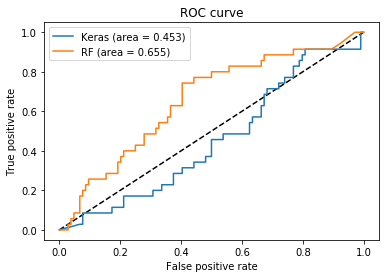

In [133]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(keras_X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


# Comparison
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# # Zoom in view of the upper left corner.
# plt.figure(2)
# plt.xlim(0, 0.2)
# plt.ylim(0.8, 1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve (zoomed in at top left)')
# plt.legend(loc='best')
# plt.show()

Not that promising. Even out of the box random forest beats our LSTM. <br>
We can see that both algorithms couldn't achive higher TPR and low FPR in the same time.

# 9. Run all combinations 
Auto-Sklearn is a module that try to search for an ensamble of classifiers from sklearn library. I run it for 24 hours.

### Results:
Accuracy of 0.755. We got it using Adagrad. I'm sorry, I run this algorithm on other computer, and didn't save the model. So all you can see is the final accuracy, without the other measurments.

In [3]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics


cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2018-08-01 13:38:38,745:EnsembleBuilder(1):fda9f17a2669a28d2b714bcad826786e] No models better than random - using Dummy Classifier!
[WARNING] [2018-08-01 13:38:38,756:EnsembleBuilder(1):fda9f17a2669a28d2b714bcad826786e] No models better than random - using Dummy Classifier!


/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

[WARNING] [2018-08-01 13:49:56,023:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-08-01 13:49:56,023:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/gelleral/anaconda3/envs/shay_temp/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanme

Accuracy score 0.7553956834532374


# 10. If I had infinit amount of time - Future work

I have lost of ideas to try:
1. The classes are imbalances, maybe we can try to upsample from the smaller class or downsample from the bigger class.
2. I would try to generate more instances with SMOTE or similar algorithms.
3. Because the class imbalanced, I would try to learn one-class classifiers on the bigger class.
4. The data is time seriese look stationary. Try sliding window models or other models for stationary data.
5. We saw that the train and test sets aren't that similar. I would try to mix the train and test sets, shuffle them and split them again.
6. We saw that there are a lot of outliers. I would try to remove, cap, transform them and see the results.
7. We know that the Rictor Scale is logarithmic. We can upscale the values of all the musurments and then apply the classifiers.
8. Try some embedding methods (like autoencoders) to transform the features into another representation.
9. Finalize a specific model!!!!!

